<a href="https://colab.research.google.com/github/duchaba/python_3D_visualization_p3vi/blob/master/Python_3D_Graphs_p3vi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# OPTIONAL
# For Google Colab, (1) Open the "concole", e.g. right-click and inspect, (2) Copy the below scripts (from line #10 to #17) and run it.
#
# If you know how to hack Google Colab Jupyter notebook and run "javascripts" as-is below, 
#i.e., without the need for opening up the console, please share it with me.
#
# The Javascript is to highlight the code cells' input and output and the code-cells you have executed.
#
%%js
var head = document.head || document.getElementsByTagName("head")[0];
var style = document.createElement("style");
var css = ".inputarea.code{border-left: 4px solid #20c997;}.cell.focused .inputarea.code{border-left: 4px solid #d63384;}.cell .output{border-left: 4px solid #ffc107;}";
css = css + ":root { --colab-fresh-execution-count-color: #d63384;}";
css = css + ".markdown blockquote {border-left: 10px solid #fd7e14 !important;border-radius: 10px 0 0 10px;padding: 1em 1em 1em 1em;border-bottom: 1px solid #343845}"
css = css + " h1,h2,h3,h4,h5 {font-family:serif !important;}"
css = css + "h1{color:#e83e8c !important;;} h2{color:#20c997 !important;;} h3{color:#fd7e14 !important;;} h4{color:#6610f2 !important;}"
head.appendChild(style);
style.type = "text/css";
style.appendChild(document.createTextNode(css));


<IPython.core.display.Javascript object>

# 1 - Introduction

Welcome to the "Python 3D Visualization" (p3vi) project. Similarly to the "Python 2D Graph" (p2go) project, it is a hackable, step-by-step for visualizing a 3D graph Python-object.

I classify the "p3vi" as a "sandbox" or "toy" project. In other words, it is a fun, experimental project focusing on solving one problem.

We learned using graph-paper to draw linear algebra equations in Jr. High school, and to some extent, a 3D graph of cubes and cones. In math, we learned to work with 3, 4, n-th dimensions arrays. Therefore, I thought I have adequate working knowledge of spatial acuity.

But I was wrong. Tracing an arbitrary line in a 3D graph, using the "x, y and z" coordinate, is not simple. It is not simple for me. There are plenty of Python libraries that draw commonly used 3D charts to visualize extensive data set, such as terrain graph or weather formation. Still, none enable me to draw an arbitrary 3D line, not from the linear equation, or visualize my far-fetched ideas of graphing NLP data in 3D or finding 3D-patterns in image categorization.

As with the "p2go" project, why not do it yourself? 

I earnestly believe in strengthen original-thinking over memorizing terminology. It is wise to learn from others, but why stop there? Your wild hunches are as significant as the great discoveries in their early stage.



><center><h2><i>So if you are ready, let's take a collective calming breath …  … and begin.</i></h2></center>

# 2 - The Journey

- As a good little programmer, we start by creating an object or class.

- The “sandbox” project’s preferred programming style is the “river” coding style.

- The “river” coding style uses a full library name, sub-class, and following by the function name. Jupyter notebook has auto-complete, so there will be no misspell function name, and it encourages to explore other methods in the library. For example, do NOT use the global-space as in "import numpy *" or using the shorten name like "import matplotlibl.pyplot as ptl” instead of using the full [river] name as in “numpy.random.randint().”

- In addition, the “river” coding style encourages writing traditional code and not using the Python language-specific syntax shorthand, such as the “assigned if.”

- The primary reason for using the “river” coding style coupled with a descriptive naming convention is that it is easier to read and hack.

- We are in the exploration journey, and therefore, we will consider code compaction and code execution speed when we refactor the code again in the full Python IDE like [Atom IDE](https://atom.io/).

In [ ]:
import numpy
import matplotlib

In [ ]:
class p3vi(object):
  #
  # initialize the object
  def __init__(self):
    self.author = "Duc Haba"
    self.name = "Ducky"
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Author is", self.author)
    self._ph()
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  #
# ---end of p3vi class

- Typically a dog name is chosen, e.g., "Tank", "Lefty" or "Spock," but be warned, don't name it after your cat, because a "cat" will not follow any commands.

- For the journey, the companion name is "Ducky." Imagine being on a farm, and calling out "here, ducky, ducky... here, ducky, ducky" and a dog comes running. It's pretty funny.


In [ ]:
ducky = p3vi()

---------------------------------------- : ----------------------------------------
                              Hello from : p3vi
                               Author is : Duc Haba
---------------------------------------- : ----------------------------------------


><h3><i>If you don't like naming your dog "Ducky," you should hack the notebook and change the name :-)</i></h3>

- The following is a clean version. Ducky cleans up the tried-and-errors cells, but please don't let it stop you from inserting your code-cells as we make this journey together. 

- When copying the code into the Atom's project, Ducky would add the methods during the class definition, but in a notebook, we can hack-it and add new functions as need it.

In [ ]:
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator

- We begin by teaching Ducky five tricks.

1. Fetch random data and test it.

2. Fetch the canvas from matplotlib.

3. See colors. On an ancillary note, a dog can see two colors, a shade of blue and yellow, but Ducky can do better because he is a one fifth part duck. :-)

4. Fetch the eight corners of the 3D box and connect them.

5. Draw a 3D-box and test it.

In [ ]:
@add_method(p3vi)
def fetch_data(self,siz=8):
  mx = numpy.ones((siz,3)) # x, y, z coordinate
  mx[:,0] = numpy.random.randint(0,siz,size=siz)  # set x-coordinate
  mx[:,1] = numpy.random.randint(0,siz,size=siz)  # y-coor
  mx[:,2] = numpy.random.randint(0,siz,size=siz)  # z-coor
  return mx
#
#
#
@add_method(p3vi)
def fetch_data_rubix(self):
  # create a rubix cube with 12 special x,y,z coordinate.
  # It contains 12 x,y,z special coordinate points.
  # lower, left, right is coordinate (1,1,1)
  mx = numpy.ones((12,3))
  mx[0,:] = [1,1,1] 
  mx[1,:] = [2,2,2]
  mx[2,:] = [3,3,3]
  mx[3,:] = [1,1,2]
  mx[4,:] = [1,1,3]
  mx[5,:] = [2,1,3]
  mx[6,:] = [3,1,3]
  mx[7,:] = [3,2,2]
  mx[8,:] = [2,3,1]
  mx[9,:] = [1,3,2]
  mx[10,:] = [1,2,1]
  mx[11,:] = [2,2,1]
  return mx
#
#
# test it
coor = ducky.fetch_data()
ducky._ph()
ducky._pp("3D coorinate data (random)", coor)
ducky._pp("Good Ducky", "Wuff Wuff, (It is a woff with a slight duck accent)")
ducky._ph()

---------------------------------------- : ----------------------------------------
              3D coorinate data (random) : [[1. 5. 4.]
 [7. 5. 0.]
 [7. 1. 3.]
 [2. 6. 1.]
 [0. 0. 6.]
 [0. 7. 7.]
 [1. 5. 7.]
 [2. 5. 2.]]
                              Good Ducky : Wuff Wuff, (It is a woff with a slight duck accent)
---------------------------------------- : ----------------------------------------


In [ ]:
# fetch canvas
# return: figure (the canvas) and axes (a picture within a canvas). 
# A canvas can have multiple pictures.
@add_method(p3vi)
def fetch_canvas_3d(self, row=1,col=1,siz=(12,9)):
  fig, axe = matplotlib.pyplot.subplots(row, col, figsize=siz)
  if (row==1) and (col==1):
    #axe = matplotlib.pyplot.axes(projection='3d')
    axe.axis('off')
    axe = fig.add_subplot(row, col, 1, projection='3d')
  elif (row==1) and (col>1):
    for i in range(col):
      axe[i].axis('off')
      axe[i] = fig.add_subplot(row, col, i+1, projection='3d')
  elif (row>1) and (col>1):
    k = 1
    for i in range(row):
      for j in range(col):
        axe[i,j].axis('off')
        axe[i,j] = fig.add_subplot(row, col, k, projection='3d')
        k = k + 1
  return fig, axe


In [ ]:
# see bootstrap default colors
@add_method(p3vi)
def see_color(self):
  self.color_green = "#28a745"
  self.color_indigo = "#6610f2"
  self.color_teal = "#20c997"
  self.color_pink = "#e83e8c"
  self.color_cyan = "#17a2b8"
  self.color_red = "#dc3545"
  self.color_blue = "#007bff"
  self.color_orange = "#fd7e14"
  self.color_yellow = "#ffc107"
  self.color_purple = "#6f42c1"
  self.color_gray900 = "#212529"
  self.color_gray800 = "#343a40"
  self.color_gray700 = "#495057"
  self.color_gray500 = "#adb5bd"
  self.color_gray200 = "#e9ecef"
  cm = matplotlib.pyplot.get_cmap("rainbow")
  self.color_rainbow_map = cm
  self.color_rainbow = cm(numpy.arange(0,200,2)) # 100 colors
  cm = matplotlib.pyplot.get_cmap("tab20")
  self.color_earthy = cm(numpy.arange(0,20,1)) # take 20 colors
  cm = matplotlib.pyplot.get_cmap("winter")
  self.color_ocean_map = cm
  cm = matplotlib.pyplot.get_cmap("viridis")
  self.color_forest_map = cm 
  cm = matplotlib.pyplot.get_cmap("cool")
  self.color_bluepink_map = cm
  return  
#
# do it
ducky.see_color()

In [ ]:
# fetch the x,y,z coordinate from the six corner of a 3D-box
# and connect them 
@add_method(p3vi)
def fetch_3d_box_corners(self, mx):
  # six corners
  xmin = mx[:,0].min()
  xmax = mx[:,0].max()
  ymin = mx[:,1].min()
  ymax = mx[:,1].max()
  zmin = mx[:,2].min()
  zmax = mx[:,2].max()
  # take the minimum of the minimums to make the 3D-box nicer
  m = numpy.array([xmin,ymin,zmin]).min()
  xmin = ymin = zmin = m
  #
  # get the coordinates to connet them into a box
  cor = numpy.zeros((16, 3))
  # connect bottom
  cor[0] = [xmin, ymin, zmin]
  cor[1] = [xmax, ymin, zmin]
  cor[2] = [xmax, ymax, zmin]
  cor[3] = [xmin, ymax, zmin]
  cor[4] = [xmin, ymin, zmin]
  # connect top
  cor[5] = [xmin, ymin, zmax]
  cor[6] = [xmax, ymin, zmax]
  cor[7] = [xmax, ymax, zmax]
  cor[8] = [xmin, ymax, zmax]
  cor[9] = [xmin, ymin, zmax]
  # connect verticle lines
  cor[10] = [xmax, ymin, zmax]
  cor[11] = [xmax, ymin, zmin]
  cor[12] = [xmax, ymax, zmin]
  cor[13] = [xmax, ymax, zmax]
  cor[14] = [xmin, ymax, zmax]
  cor[15] = [xmin, ymax, zmin]
  return cor

In [ ]:
# draw 3D line graph
@add_method(p3vi)
def draw_graph_3d_line(self, axe, mx,colo=None,wid=1.4):
  if colo:
    _colo = colo 
  else:
    _colo = self.color_pink
  #
  # draw it (x,y,z)
  axe.plot3D(mx[:, 0], mx[:, 1], mx[:, 2], color=_colo,linewidth=wid)
  return

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws 3D box, but the coordinate are random :-(
---------------------------------------- : ----------------------------------------


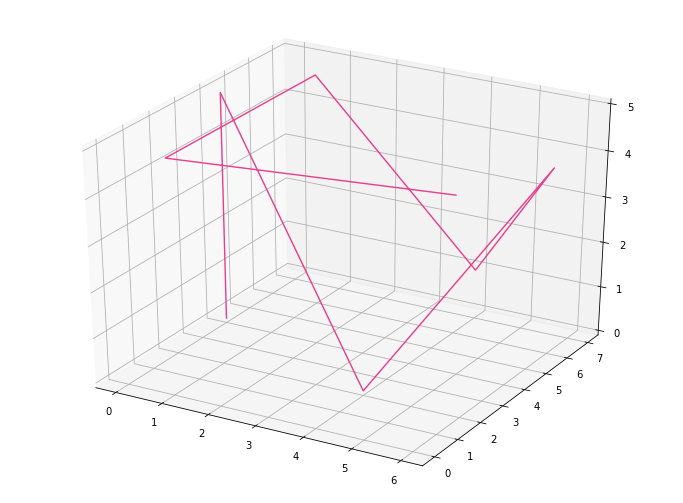

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Draws 3D box, but the coordinate are random :-(")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_data()
ducky.draw_graph_3d_line(pic,coor)
canvas.show()

- That was an embarrassing mistake. Ducky forgets to fetch the eight corners of the 3D box and connect them.



---------------------------------------- : ----------------------------------------
                                   Ducky : Draws 3D box :-)
---------------------------------------- : ----------------------------------------


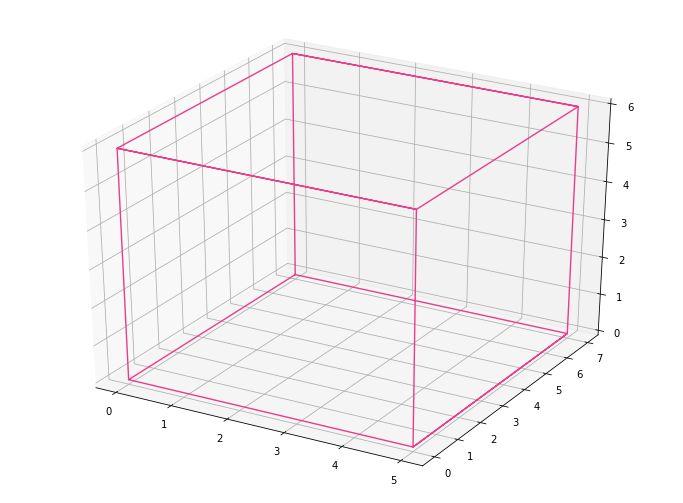

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Draws 3D box :-)")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_data()
box3d = ducky.fetch_3d_box_corners(coor)
ducky.draw_graph_3d_line(pic,box3d)
canvas.show()

- Ducky begins to understand the 3D plot with "x,y, and z" coordinates. It helps that we did the [2D graph first in the "p2go" project](https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba/). 

- The next step is to teach Ducky how to draw a frame around the graph with labels and titles. 

- We will ask Ducky to draw a 3D-box with the frame concept.  

In [ ]:
#
# draw picture frame info. 
@add_method(p3vi)
def draw_graph_3d_frame(self,axe,mx,lab="3D Graph"):
  axe.set_title(lab, fontsize=18, color=self.color_blue)
  axe.set_xlabel("x-values, Total Count: " + str(len(mx[:,0])), fontsize=18, color=self.color_pink)
  axe.set_ylabel("y-values", fontsize=18, color=self.color_teal)
  axe.tick_params(labelcolor=self.color_orange, labelsize="medium")
  #
  # draw the 3D box surround the data
  box3d = self.fetch_3d_box_corners(mx)
  self.draw_graph_3d_line(axe,box3d,colo=self.color_gray700,wid=0.8)
  return


---------------------------------------- : ----------------------------------------
                                   Ducky : Plots 3D coordinate with frame :-)
---------------------------------------- : ----------------------------------------


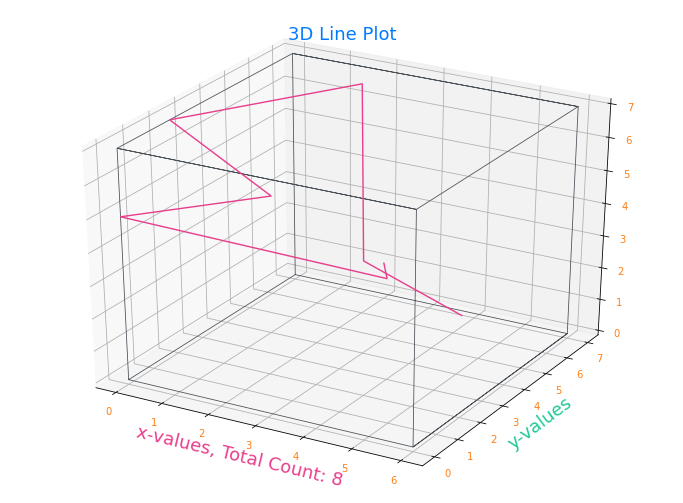

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Plots 3D coordinate with frame :-)")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_data()
ducky.draw_graph_3d_frame(pic,coor,lab="3D Line Plot")
ducky.draw_graph_3d_line(pic,coor)
canvas.show()

- Since the coordinate is random, Ducky can't visualize the path of the 3D line plot. Where is the beginning, and where does it ends?

- We will teach Ducky 3D-scatter graph, line with points, and labeling each point. Maybe that would help to improve Ducky's spatial acuity.

1. Draw a 3D scatter graph.

2. Draw a 3D line graph with dots highlighting the points.

3. Ask Ducky to draw two graphs side by side on one canvas.


In [ ]:
# draw a 3D scatter graph
@add_method(p3vi)
def draw_graph_3d_point(self, axe, mx,colo=None,siz=63.0):
  if colo:
    _colo = colo 
  else:
    _colo = self.color_blue
  #
  # draw it (x,y,z)
  axe.scatter3D(mx[:, 0], mx[:, 1], mx[:, 2], color=_colo, s=siz)
  return
  #
  #
  # draw line graph with dots
@add_method(p3vi)
def draw_graph_3d_line_with_dots(self, axe, mx,colo=None,siz=63.0):
  self.draw_graph_3d_line(axe,mx,colo)
  self.draw_graph_3d_point(axe,mx,colo,siz)
  return

In [ ]:
# label each point
@add_method(p3vi)
def draw_graph_3d_point_label(self, axe, mx,colo=None):
  if colo:
    _colo = colo 
  else:
    _colo = self.color_blue
  #
  for i in range(len(mx)):
    # label them with slight offset so they don't overlap the points
    x = mx[i][0] * 1.015
    y = mx[i][1] * 1.015
    z = mx[i][2] * 1.015
    axe.text(x, y, z, i, fontsize=12,color=_colo)
  return

---------------------------------------- : ----------------------------------------
                                   Ducky : Previous graph and improved graph.
---------------------------------------- : ----------------------------------------


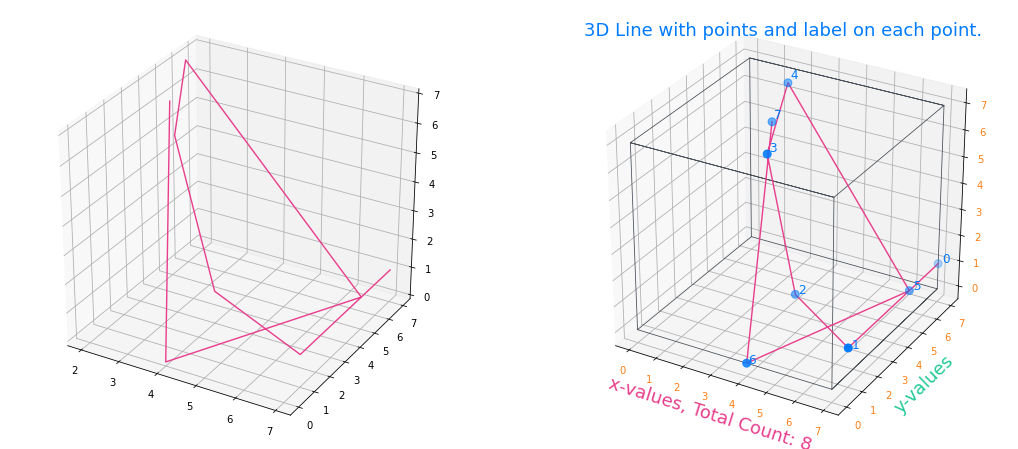

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Previous graph and improved graph.")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d(row=1,col=2, siz=(18,8))
coor = ducky.fetch_data()
ducky.draw_graph_3d_line(pic[0],coor)
#
# new and improved
ducky.draw_graph_3d_frame(pic[1],coor,lab="3D Line with points and label on each point.")
ducky.draw_graph_3d_line_with_dots(pic[1],coor)
ducky.draw_graph_3d_point_label(pic[1],coor)
canvas.show()

- It is time to bring in the Rubix cube to help Ducky to visualize the 3D coordinate.

- Ducky is placing the white color top, yellow bottom, green facing, blue back, orange left, and red right on the Rubix cube. Therefore, the origin coordinate (0-0-0) is at the lower, left, back piece, i.e., the orange, blue, and yellow ones.

  - On an ancillary note, I hold the Rubix cube in my hands while programming CNN's "kernel." It is 3-by-3, R-G-B; it's perfect.

- The "default" view is rotated counter-clockwise and tilt downward, i.e., white on the top, orange left-side, and green right-side.

- The "other side" view is rotated clockwise and tilt downward, i.e., white on the top, red left-side, and blue right-side.

- Tracing my finger on the cube and asking Ducky to draw the paths. The result is as follows.


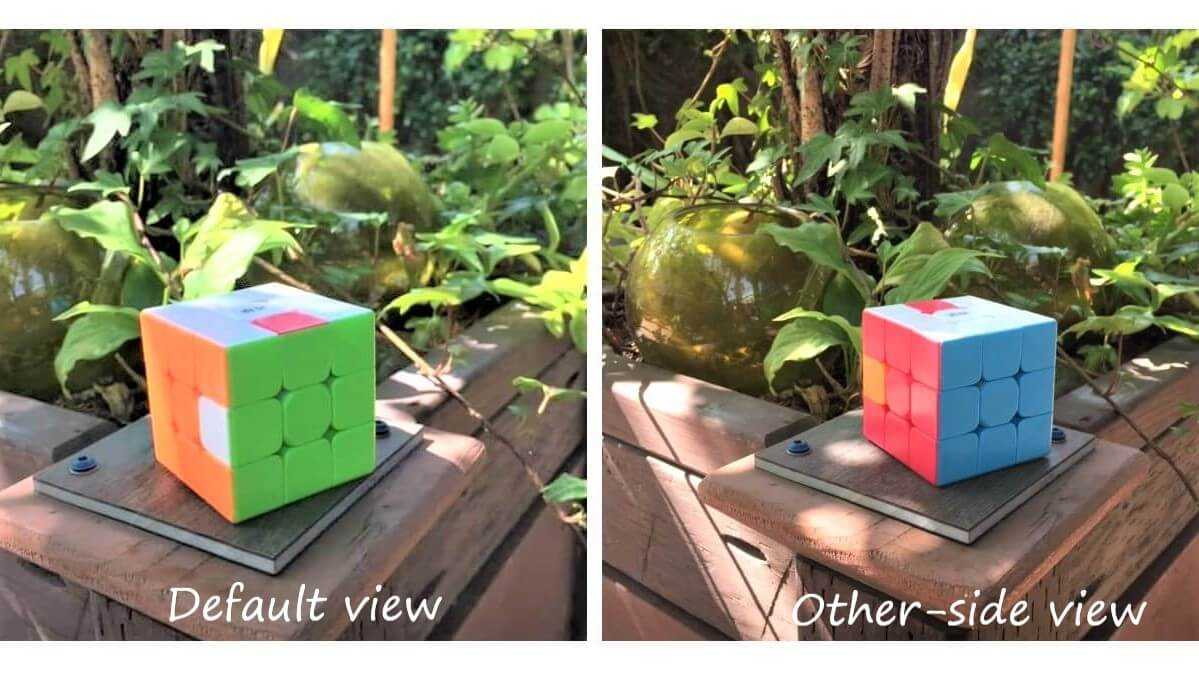

In [ ]:
#
# draw picture frame info. 
# [UPDATE] add in the drawing origin point.
@add_method(p3vi)
def draw_graph_3d_frame(self,axe,mx,lab="3D Graph",xtic=None,ytic=None,ztic=None):
  axe.set_title(lab, fontsize=18, color=self.color_blue)
  axe.set_xlabel("x-values, Total Count: " + str(len(mx[:,0])), fontsize=18, color=self.color_pink)
  axe.set_ylabel("y-values", fontsize=18, color=self.color_teal)
  axe.set_zlabel("z-values", fontsize=18, color=self.color_teal)
  axe.tick_params(labelcolor=self.color_orange, labelsize="medium")
  #
  if xtic:
    axe.set_xticks(xtic)
  if ytic:
    axe.set_yticks(ytic)
  if ztic:
    axe.set_zticks(ztic)
  #
  # draw the 3D box surround the data
  box3d = self.fetch_3d_box_corners(mx)
  self.draw_graph_3d_line(axe,box3d,colo=self.color_gray700,wid=0.8)
  # draw origin point
  # the the minimum points
  zero = numpy.zeros((1,3))
  zero[0,0] = zero[0,1] = zero[0,2] = box3d[0,0]
  self.draw_graph_3d_point(axe,zero,colo=self.color_orange, siz=180.0)
  return

---------------------------------------- : ----------------------------------------
                                   Ducky : Drawing paths on the Rubix cube.
---------------------------------------- : ----------------------------------------


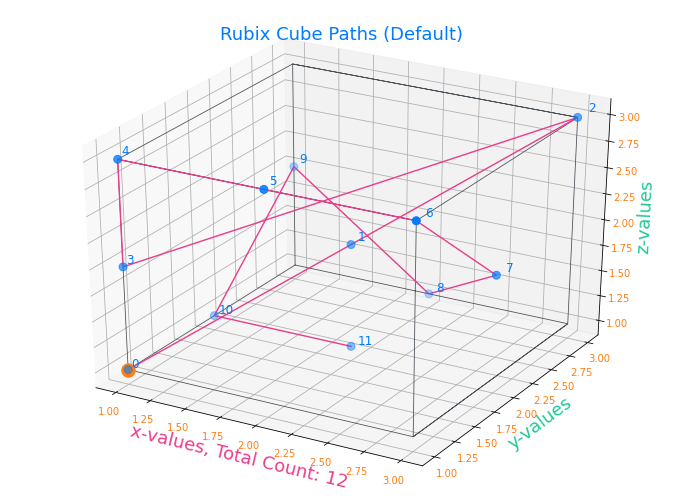

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Drawing paths on the Rubix cube.")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_data_rubix()
ducky.draw_graph_3d_frame(pic,coor,lab="Rubix Cube Paths (Default)")
ducky.draw_graph_3d_line_with_dots(pic,coor)
ducky.draw_graph_3d_point_label(pic,coor)
canvas.show()


- That is more like it. Ducky displayed the "default" view.

- Zero-point is at the origin. It is a big orange dot.

- Point-1 is at the center of the Rubix cube.

- Point-2 is upper right and front, i.e., the green, white-and-red piece. 

- Point-3 is left-center and back, i.e., the orange-and-blue piece.

- You have the idea. 

1. Can you imagine what the paths would look like if we rotate it onto the other side? The "other side" is the white top, red left-side, and blue right-side.

3. Can you imagine what it would look like if we "tilt upward" or look at the "front face" with no tilting?

  - The "rotate and tilt" function has a one-line of code. It is that simple.

4. Luckily, we have Ducky, and so, we program Ducky to do the four faces display in one command.

5. "Ducky, make it so..."



In [ ]:
# Tilt and rotate the 3D object
@add_method(p3vi)
def draw_graph_3d_tilt_rotate(self, axe, tilt=45,rota=-43,face=None):
  _tilt = tilt
  _rota = rota
  if face == "default":
    _tilt = 45
    _rota = -35
  elif face == "other":
    _tilt = 45
    _rota = 140
  elif face == "bottom":
    _tilt = -45
    _rota = -35
  elif face == "front":
    _tilt = 0
    _rota = 0
  elif face == "inverse":
    _tilt = -45
    _rota = 140
  axe.view_init(_tilt, _rota)
  return
#

In [ ]:
# Combine into one method, "make it so"
@add_method(p3vi)
def make_it_so(self):
  self._ph()
  self._pp("Ducky", "draws a path on the Rubix cube in four different aspects.")
  self._ph()
  # 
  #
  canvas, pic = self.fetch_canvas_3d(row=2,col=2, siz=(18,16))
  coor = self.fetch_data_rubix()
  #
  self.draw_graph_3d_frame(pic[0,0],coor,lab="Rubix Cube Paths (Default)")
  self.draw_graph_3d_line_with_dots(pic[0,0],coor)
  self.draw_graph_3d_point_label(pic[0,0],coor)
  self.draw_graph_3d_tilt_rotate(pic[0,0], face="default")
  #
  self.draw_graph_3d_frame(pic[0,1],coor,lab="Rubix Cube Paths (Other-side)")
  self.draw_graph_3d_line_with_dots(pic[0,1],coor)
  self.draw_graph_3d_point_label(pic[0,1],coor)
  self.draw_graph_3d_tilt_rotate(pic[0,1], face="other")
  #
  self.draw_graph_3d_frame(pic[1,0],coor,lab="Rubix Cube Paths (Bottom-up)")
  self.draw_graph_3d_line_with_dots(pic[1,0],coor)
  self.draw_graph_3d_point_label(pic[1,0],coor)
  self.draw_graph_3d_tilt_rotate(pic[1,0], face="bottom")
  #
  self.draw_graph_3d_frame(pic[1,1],coor,lab="Rubix Cube Paths (Front-face)")
  self.draw_graph_3d_line_with_dots(pic[1,1],coor)
  self.draw_graph_3d_point_label(pic[1,1],coor)
  self.draw_graph_3d_tilt_rotate(pic[1,1], face="front")
  #
  canvas.show()
  return

---------------------------------------- : ----------------------------------------
                                   Ducky : draws a path on the Rubix cube in four different aspects.
---------------------------------------- : ----------------------------------------


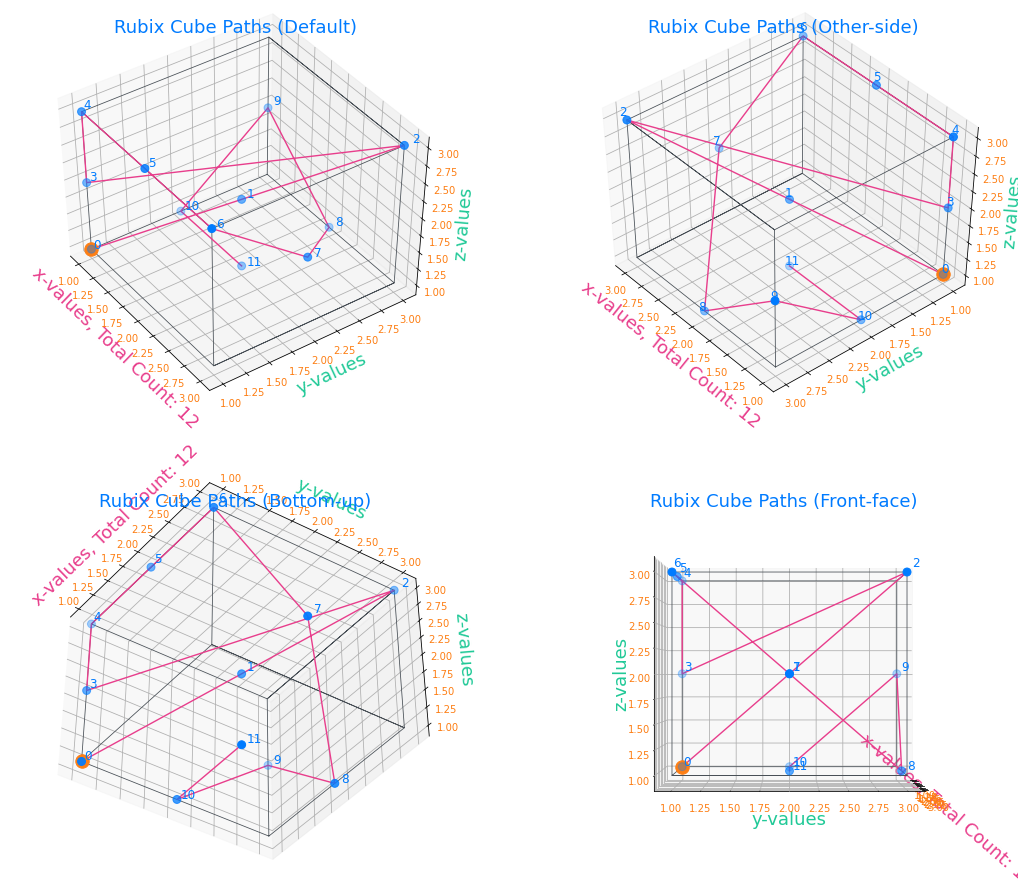

In [ ]:
# Ducky, "make it so..."
ducky.make_it_so()

- That is so interesting to see four images from a different angle at the same time. Switching from the default view to the other-side view, Ducky can follow the line between point-7 and point-8 better. In other words, that line starting at the center of the Rubix green face and ending at the bottom-center red face  (the red and yellow piece).

- From the bottom-up view, the two lines, point-8 to point-9 and point-9 to point-10, are easier to understand.

- The front-face view gives nothing new. 

- You might be ahead of Ducky, but it is time to teach Ducky about the 3D Bar graph, and afterward, we will do 3D math.



## 2.1  Diving Deep





- Once you are comfortable with 3D plotting using the "x,y, and z" coordinate, we will leap into 3D graphs. If not, you should continue hacking the above code until you understand 3D plotting. 

- The first leap is to learn the conversion between the 3D data set and the 3D graph coordinate. 

- From our earlier journey with the ["2D Graph, p2go" project](https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba/), Snoopy draws a graph from an n-th row, two columns matrix. The first column is the X-value and the second column is the Y-value. Each row represents the value-pair for X and Y.

- The essential point is all 2D graphs based on the 2-column matrix, or Tensor Rank-2 or PyTorch shape (n,2). Fancy terminology for a simple concept, e.g., "rank" or "shape," is like a lumbago.

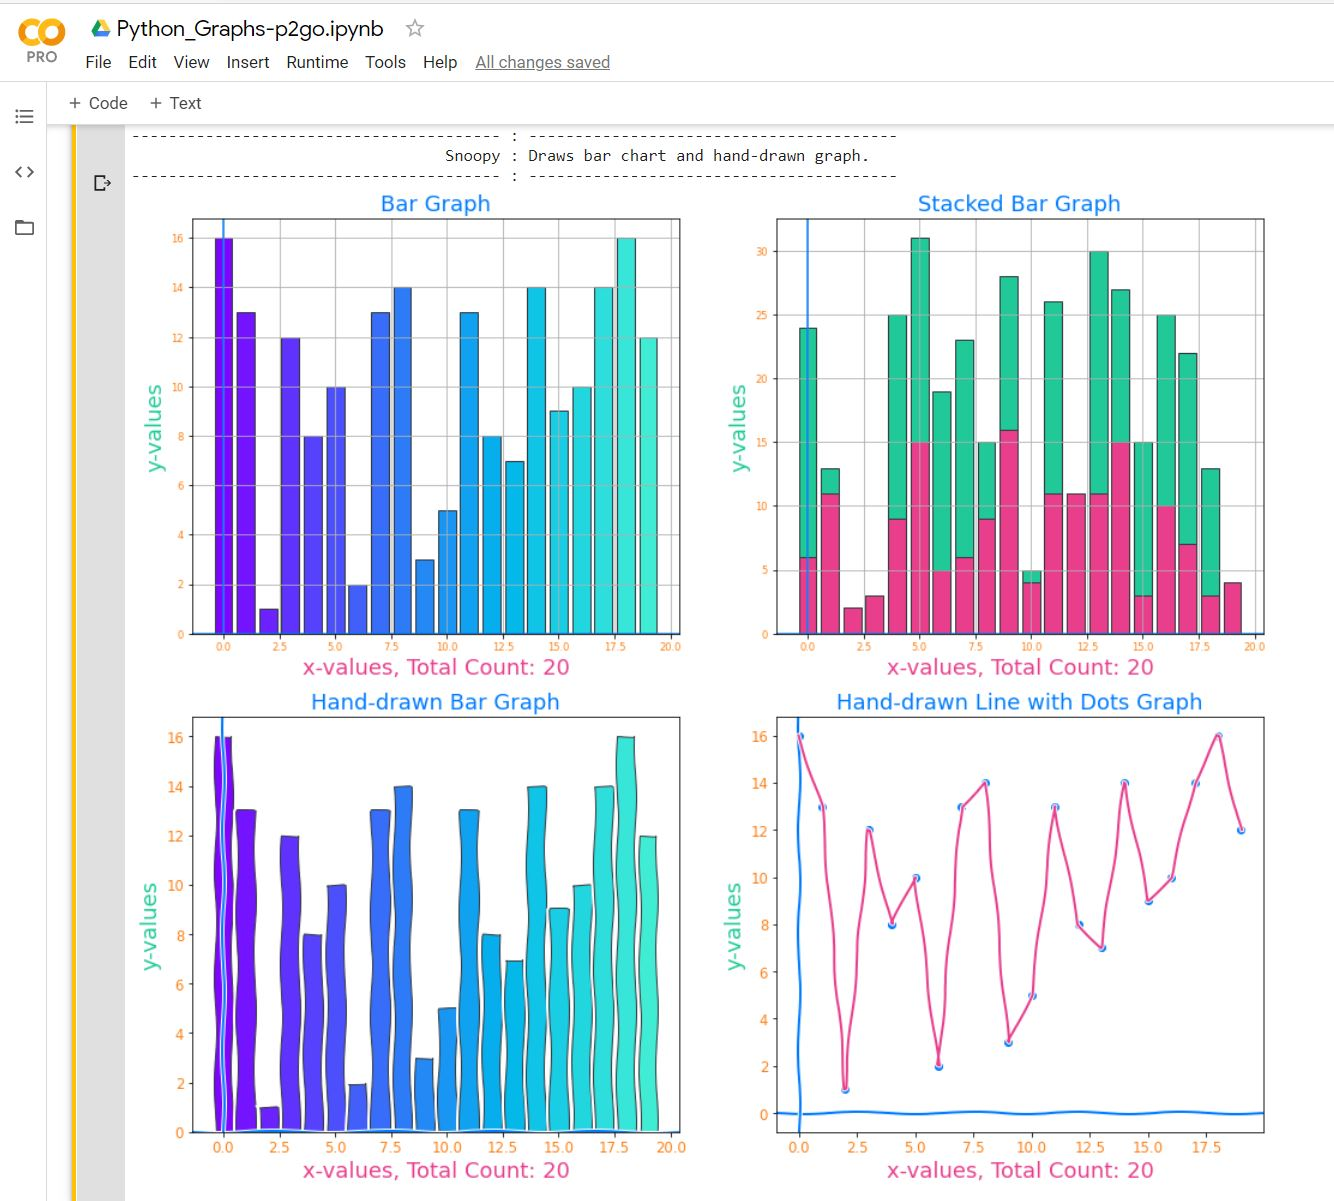

- For 3D plotting, there is a 3-column matrix, the "x, y, z" coordinate. So it seems that the 3D data set should be a 3-column matrix, but it is not.

- Ducky chooses to represent the 3D data set as a matrix with n-th columns, where the first column is the X-values, and each succession column is the Z-value. In other words, the 2nd column is the first set of the Z-value, the 3rd column is the second set of the Z-value, and so on.

- Before we dive into the code, here is why. From grade-school onward, we learned that X-direction is side-to-side or left-to-right, and Y-direction is up-and-down. That is how we do our homework by drawing a graph.

- That's not entirely correct. In a 2D world like a sheet of paper, we only have side-to-side and top-to-bottom. The up-and-down is the Z-direction in our world. 

- As an analogy of the 2D world, Ducky can waddle left-to-right or forward-to-backward. If Ducky could jump like a cat, then he would be in the 3D world.  

- Take your 2D graph, lay it flat on the table, and see that the Y-axis is forward-and-backward and not up-and-down. Therefore the up-and-down direction is the Z-axis. 

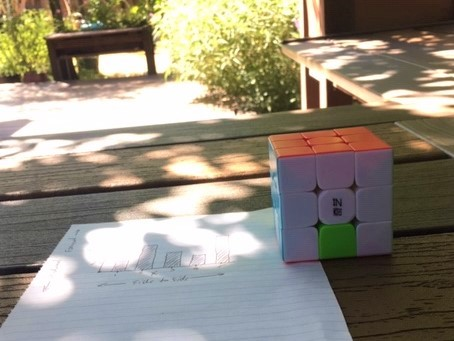

## 2.2 - 3D Data Structure

- Ducky is ready to jump in the code. It is the perfect hackable intersection in our journey.

- If you don't like Ducky's representation of the 3D data set, hack it to your 3D data structure. Ducky is 100% cheering you on to hack this notebook. It's the reason why we choose the Jupyter notebook.

- Again, Ducky chooses to represent the 3D data set as the n-th matrix with the first column is the X-value, and subsequence columns are the Z-value. The Y-value is the column count of the Z-value, i.e., the first Z-data-set is Y-value one, the second is Y-value two, and so on.


In [ ]:
# Fetch a multi-data set matrix, where the first column is the x-values. 
# The y-values are the 2nd, 3rd, nth columns.
@add_method(p3vi)
def fetch_multi_data(self, row=100, col=4, is_nega=False):
  mx = numpy.ones((row,col))
  # x value counting from zero to size of row
  mx[:,0] = numpy.arange(0,row, 1)
  #
  if is_nega:  # if negative allow
    _min = row * -1
  else:
    _min = 0
  for i in range(col-1):
    mx[:,i+1] = numpy.random.randint(_min,row,size=row)
  return mx

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "Displays multi-data set.")
ducky._pp("First column is X-values", "Follow by five Z-data-set")
# 
mx = ducky.fetch_multi_data(row=10,col=6)
#
ducky._pp("10 rows by 6 columns", mx)
ducky._pp("Y-value", "[0, 1, 2, 3, 4]")
ducky._pp("Good boy", "You're a good boy. Don't let other fowls make fun of your name.")
ducky._ph()

---------------------------------------- : ----------------------------------------
                                   Ducky : Displays multi-data set.
                First column is X-values : Follow by five Z-data-set
                    10 rows by 6 columns : [[0. 9. 2. 8. 7. 1.]
 [1. 1. 8. 4. 8. 3.]
 [2. 0. 1. 1. 9. 7.]
 [3. 8. 2. 0. 6. 7.]
 [4. 7. 4. 9. 1. 6.]
 [5. 1. 4. 5. 5. 0.]
 [6. 0. 1. 6. 1. 5.]
 [7. 1. 5. 6. 0. 9.]
 [8. 4. 1. 6. 3. 9.]
 [9. 4. 7. 7. 0. 6.]]
                                 Y-value : [0, 1, 2, 3, 4]
                                Good boy : You're a good boy. Don't let other fowls make fun of your name.
---------------------------------------- : ----------------------------------------


## 2.3 Hand-drawn Style

- Ducky is feeling left-out because his canine pack thinks that he is sitting around and do nothing. Do you get it? "Sitting duck" :-)

- The hand-drawn style is cool, so we will teach Ducky to do it. It is one code-line, and he stole it from [Snoopy in the “p2go” project.](https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba/) 


In [ ]:
# handdrawn draw line graph with dots
@add_method(p3vi)
def draw_graph_3d_line_with_dots_hand_drawn(self, axe, mx,colo=None,siz=63.0):
  with matplotlib.pyplot.xkcd():
    self.draw_graph_3d_line_with_dots(axe,mx,colo,siz)
  return

---------------------------------------- : ----------------------------------------
                                   Ducky : Hand-drawn style
---------------------------------------- : ----------------------------------------


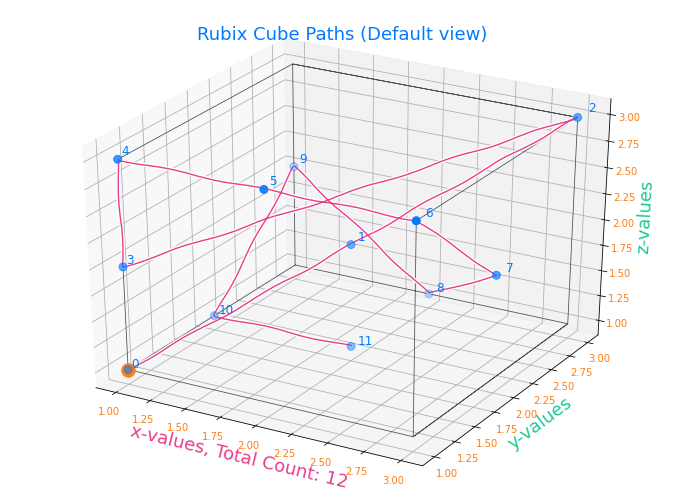

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "Hand-drawn style")
ducky._ph()
# 
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_data_rubix()
ducky.draw_graph_3d_frame(pic,coor,lab="Rubix Cube Paths (Default view)")
ducky.draw_graph_3d_line_with_dots_hand_drawn(pic,coor)
ducky.draw_graph_3d_point_label(pic,coor)
canvas.show()

## 2.4 Bar Chart 2.5D

- Before jumping into a 3D bar chart by matplotlib, we will visualize our 3D-data set by drawing a 2D bar chart on a sheet of paper and line them up.

- Ducky can learn to do it, and we will call it a 2.5D bar charts. By doing the 2.5D bar chart, it will reinforce our understanding of the 3D-data set. As an AI Scientist, understanding your data set is the first and paramount step in coding an Artificial Neural Network (ANN).




In [ ]:
# graph multi-set data in bar chart
@add_method(p3vi)
def draw_graph_2d5_multi_bar(self,axe, mx,head="2.5D Multi-bars",is_colo=True):
  axe.set_xlabel("X-values")
  axe.set_ylabel("Multi-data Set Count (Y-axis)")
  axe.set_zlabel("Z-values")
  axe.set_title(head)
  row, col = mx.shape
  x = mx[:,0]
  for i in range(col-1):
    y = mx[:,i+1]
    if is_colo:
      j = i % len(self.color_earthy)
      axe.bar(x, y, zs=i, zdir="y", color=self.color_earthy[j])
    else:
      axe.bar(x, y, zs=i, zdir="y", color=self.color_teal)
  return


---------------------------------------- : ----------------------------------------
                                   Ducky : 2.5D Multi-bar graph
                           X-value count : 20, [0 .. 19]
                      Data-set count (Y) : 5
                                 Z-value : Between 0 to 20
---------------------------------------- : ----------------------------------------


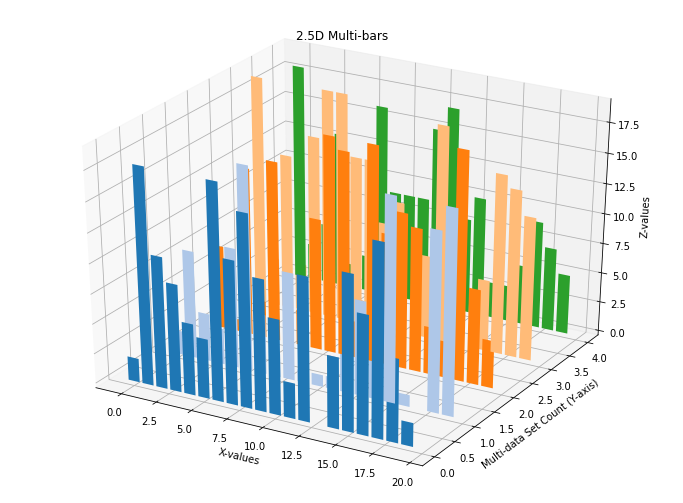

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "2.5D Multi-bar graph")
ducky._pp("X-value count", "20, [0 .. 19]")
ducky._pp("Data-set count (Y)", "5")
ducky._pp("Z-value", "Between 0 to 20")
ducky._ph()
# 
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_multi_data(row=20,col=6)
ducky.draw_graph_2d5_multi_bar(pic,coor)
canvas.show()


- Some of the data is hidden behind the front view data. We know how to solve this problem. Earlier, we use "rotate and tilt" to view different facet of the 3D objects. We can do the same here.

---------------------------------------- : ----------------------------------------
                                   Ducky : 2.5D Multi-bar graph and multi-views
                           X-value count : 20, [0 .. 19]
                      Data-set count (Y) : 5
                                 Z-value : Between 0 to 20
---------------------------------------- : ----------------------------------------


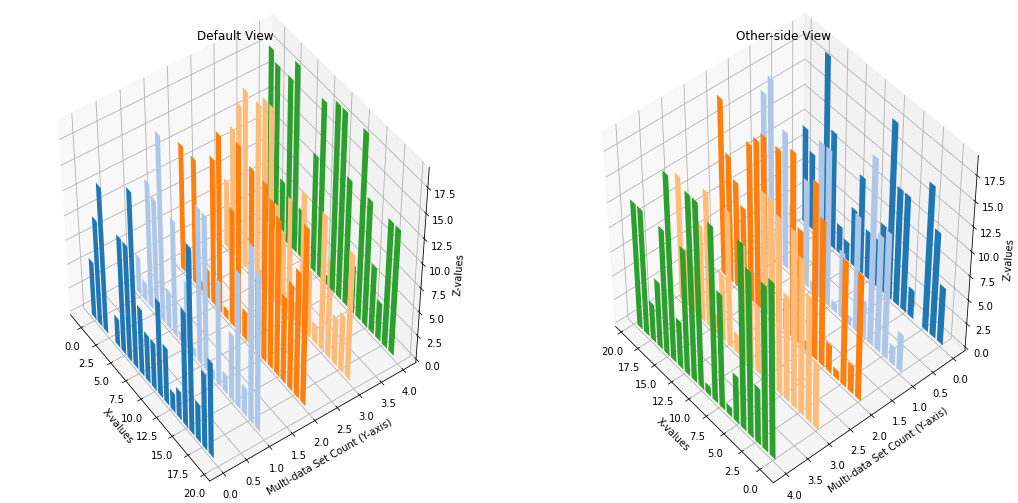

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "2.5D Multi-bar graph and multi-views")
ducky._pp("X-value count", "20, [0 .. 19]")
ducky._pp("Data-set count (Y)", "5")
ducky._pp("Z-value", "Between 0 to 20")
ducky._ph()
# 
#
canvas, pic = ducky.fetch_canvas_3d(row=1,col=2, siz=(18,9))
coor = ducky.fetch_multi_data(row=20,col=6)
#
ducky.draw_graph_2d5_multi_bar(pic[0],coor,head="Default View")
ducky.draw_graph_3d_tilt_rotate(pic[0],face="default")
#
ducky.draw_graph_2d5_multi_bar(pic[1],coor,head="Other-side View")
ducky.draw_graph_3d_tilt_rotate(pic[1],face="other")
canvas.show()


- What if the Z-data set has negative numbers? It may be helpful if we look from the bottom view.

---------------------------------------- : ----------------------------------------
                                   Ducky : 2.5D Multi-bar graph and multi-views
                           X-value count : 20, [0 .. 19]
                      Data-set count (Y) : 5
                                 Z-value : Between -20 to 20
---------------------------------------- : ----------------------------------------


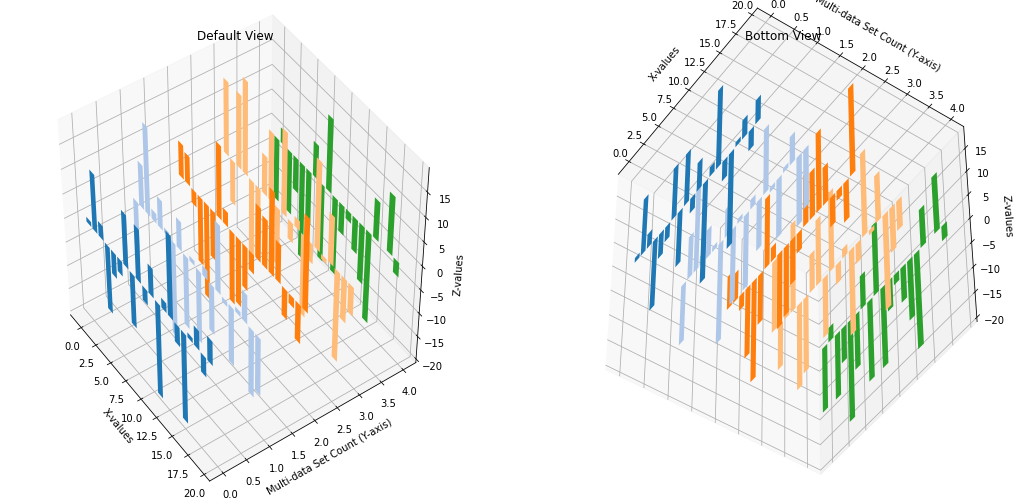

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "2.5D Multi-bar graph and multi-views")
ducky._pp("X-value count", "20, [0 .. 19]")
ducky._pp("Data-set count (Y)", "5")
ducky._pp("Z-value", "Between -20 to 20")
ducky._ph()
# 
#
canvas, pic = ducky.fetch_canvas_3d(row=1,col=2, siz=(18,9))
coor = ducky.fetch_multi_data(row=20,col=6, is_nega=True)
#
ducky.draw_graph_2d5_multi_bar(pic[0],coor,head="Default View")
ducky.draw_graph_3d_tilt_rotate(pic[0],face="default")
#
ducky.draw_graph_2d5_multi_bar(pic[1],coor,head="Bottom View")
ducky.draw_graph_3d_tilt_rotate(pic[1],face="bottom")
canvas.show()

## 2.5 Bar Chart 3D

- You should hack the notebook if you need help to understand the 3D-data set and the 2.5D bar chart. 

- It is relatively easy to convert our 3D-data set to a matplotlib 3D graph from this point onward.

- Matplotlib uses "x,y, and z" coordinate, a three-column matrix, as we saw earlier with our Rubix cube path tracing exercise. So how does matplotlib handles multiple Z-data set?

- It appends the next Z-data set to the tail of the three-column matrix. Therefore, it needs to repeat the same X-values and Y-values every time it appends a new Z-data set.

- In our 3D-data set, the first column is the X-data set, the second, third, and n-th column are the Z-data set, and the Y-data set is implied in the structure, i.e., the column count.

- We teach Ducky to fetch the matplotlib's "x, y, and z" data set from our 3D-data set. 

  - <i>On an ancillary note, why don't I use the verb "convert?" They are similar terminology, i.e., "to get some new thing back." Ducky, my dog, is not very smart, so I stay with "fetch." It is one more reason that you should hack the notebook and make it your own. :-) </i>

In [ ]:
# fetch matplotlib coordinate
@add_method(p3vi)
def fetch_mat_coordinate(self, mx):
  row, col = mx.shape
  _x = mx[:,0]
  _y = numpy.arange(0.0,(col-1), 1)
  _z = mx[:, 1:col]
  #
  # numpy has two useful methods, "meshgrid()" which produce the repeativie x,y coordinates.
  # and "ravel()" which flatten a matrix to a vector
  _x1, _y1 = numpy.meshgrid(_x, _y)
  x = _x1.ravel()
  y = _y1.ravel()
  # tranpose the z-matrix and flatten it into a vector
  _z1 = _z.T
  z = _z1.flatten() 
  return x,y,z

- The above few code lines are essential, so we double-checked. The conversion between the 3D-data set to matplotlib's "x,y, and z" coordinates is as follows.


In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "Ducky sees, ducky do.")
#
mx = ducky.fetch_multi_data(row=6,col=4)
x,y,z = ducky.fetch_mat_coordinate(mx)
#
ducky._pp("3D-data set", mx)
ducky._pp("Converted matplotlib X-values", x)
ducky._pp("Converted matplotlib Y-values", y)
ducky._pp("Converted matplotlib Z-values", z)
ducky._ph()


---------------------------------------- : ----------------------------------------
                                   Ducky : Ducky sees, ducky do.
                             3D-data set : [[0. 1. 0. 0.]
 [1. 1. 3. 2.]
 [2. 4. 3. 1.]
 [3. 1. 1. 5.]
 [4. 0. 1. 2.]
 [5. 4. 3. 4.]]
           Converted matplotlib X-values : [0. 1. 2. 3. 4. 5. 0. 1. 2. 3. 4. 5. 0. 1. 2. 3. 4. 5.]
           Converted matplotlib Y-values : [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]
           Converted matplotlib Z-values : [1. 1. 4. 1. 0. 4. 0. 3. 3. 1. 1. 3. 0. 2. 1. 5. 2. 4.]
---------------------------------------- : ----------------------------------------


- The hard part is done, so onward to the easy part. It is "hard" because it is an original thought. Regurgitate what other people are doing is easy.

In [ ]:
# get rainbow colors
# selecting rainbow color is a bit tricky. We want to take either evenly space color
# in the rainbow or slowly in increment through the rainbow.
@add_method(p3vi)
def fetch_the_rainbow(self, max, is_colo=True):
  p = len(self.color_rainbow) - 1
  if is_colo:
    i = numpy.round(numpy.linspace(0, p, max)).astype(int)
    _colo = self.color_rainbow[i,:]
  else:
    j = numpy.array([p,max]).min()
    i = numpy.round(numpy.linspace(0, j, max)).astype(int)
    _colo = self.color_rainbow[i,:]
  #
  return _colo
#
#
# draw graph 3d bar chart
@add_method(p3vi)
def draw_graph_3d_bar(self, axe, mx, head="3D Bars",is_colo=True):
  # bar3d has six primary variables: x, y, z (bottom), dx (width), dy (depth), dz (height)
  # where x,y is same as our x,y
  # the dz (height) is same as our z
  # the bottom is all zeros
  # default width, depth equal to 1 (one unit)
  x, y, z = self.fetch_mat_coordinate(mx)
  bottom = numpy.zeros_like(z)
  width = 0.7
  depth = 0.7
  #
  # selecting rainbow color is a bit tricky. We want to take either evenly space color
  # in the rainbow or slowly in increment through the rainbow.
  _colo = self.fetch_the_rainbow(len(z))
  #
  axe.bar3d(x, y, bottom, width, depth, z, shade=True,color=_colo)
  axe.set_xlabel("X-values")
  axe.set_ylabel("Y-values (data set count)")
  axe.set_zlabel("Z-values")
  axe.set_title(head)
  return

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws 3D bar chart. It's easy peazy lemon squeezy.
---------------------------------------- : ----------------------------------------


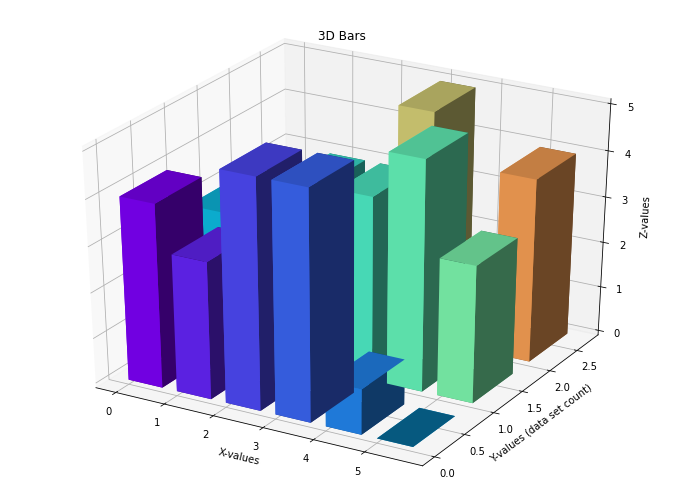

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "Draws 3D bar chart. It's easy peazy lemon squeezy.")
ducky._ph()
# 
canvas, pic = ducky.fetch_canvas_3d()
mx = ducky.fetch_multi_data(row=6,col=4)
ducky.draw_graph_3d_bar(pic,mx)
canvas.show()

- Once Ducky understands the 3D-data set, the "x,y, and z" coordinate and the data set conversion, 3D graphs are easy.

- Ducky will double verify our understanding by viewing the 2.5D bar chart side by side with the 3D bar chart.

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws 3D bar chart and 2.5D bar chart.
---------------------------------------- : ----------------------------------------


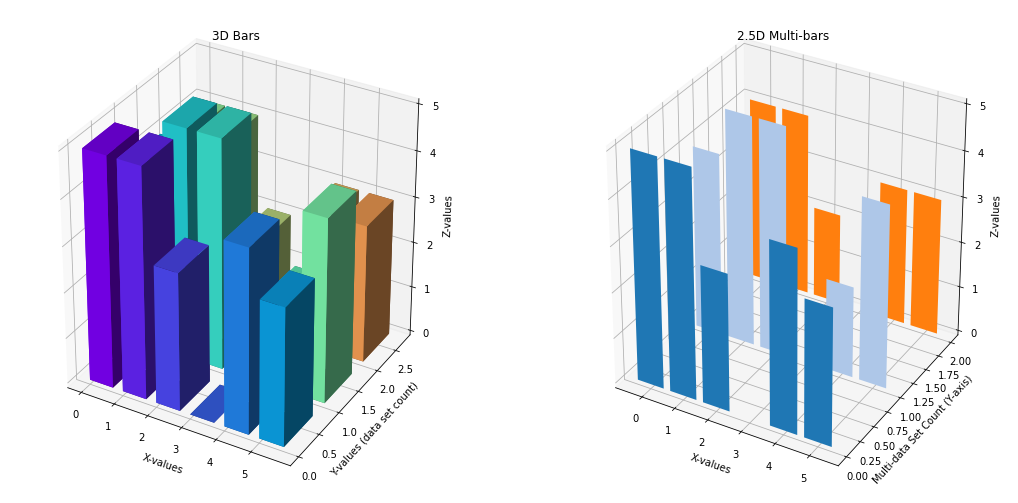

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "Draws 3D bar chart and 2.5D bar chart.")
ducky._ph()
# 
canvas, pic = ducky.fetch_canvas_3d(row=1,col=2,siz=(18,9))
mx = ducky.fetch_multi_data(row=6,col=4)
ducky.draw_graph_3d_bar(pic[0],mx)
ducky.draw_graph_2d5_multi_bar(pic[1], mx)
canvas.show()

- Some of the data is hidden behind the front view data. We know how to solve this problem. Earlier, we use "rotate and tilt" to view different facet of the 3D objects. We can do the same here.

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws 3D bar chart, 2.5D bar chart, and multi-view
---------------------------------------- : ----------------------------------------


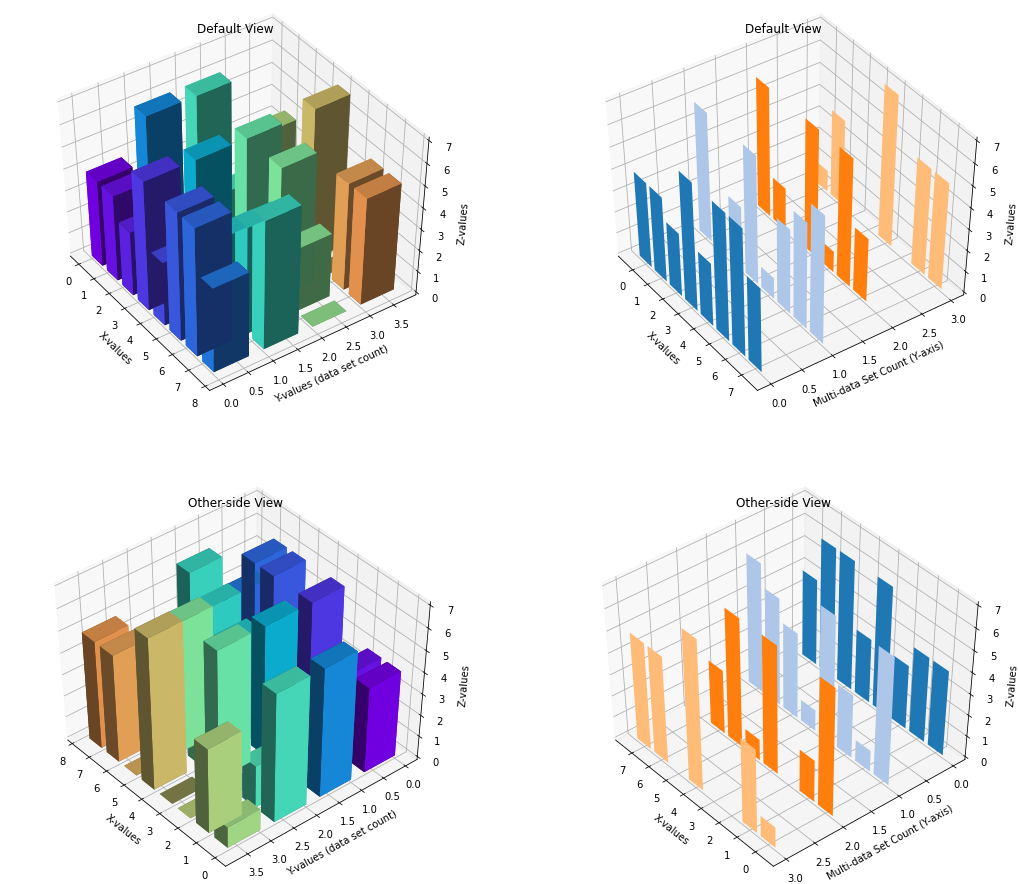

In [ ]:
# test Ducky new tricks
ducky._ph()
ducky._pp("Ducky", "Draws 3D bar chart, 2.5D bar chart, and multi-view")
ducky._ph()
# 
canvas, pic = ducky.fetch_canvas_3d(row=2,col=2,siz=(18,16))
mx = ducky.fetch_multi_data(row=8,col=5)
#
ducky.draw_graph_3d_bar(pic[0,0],mx,head="Default View")
ducky.draw_graph_3d_tilt_rotate(pic[0,0],face="default")
ducky.draw_graph_2d5_multi_bar(pic[0,1], mx,head="Default View")
ducky.draw_graph_3d_tilt_rotate(pic[0,1],face="default")
#
ducky.draw_graph_3d_bar(pic[1,0],mx,head="Other-side View")
ducky.draw_graph_3d_tilt_rotate(pic[1,0],face="other")
ducky.draw_graph_2d5_multi_bar(pic[1,1], mx,head="Other-side View")
ducky.draw_graph_3d_tilt_rotate(pic[1,1],face="other")
canvas.show()

## 2.6 Parametric Curve 3D Graph

- The 2.5D and 3D bar charts look great, and they served their purpose of helping us understand the 3D-data set and 3D "x,y, and z" coordinate.

- The weak link is when the 3D-data set is more than one hundred points, the 2.5D and 3D bar chart is less effective. In my AI work, the data-bunch average batch size is 64. That is 64 data-set (Y-axis). The rows (X-axis) is upward of 2,500. 

- Visualizing my AI work data set might take a different "sandbox" or "toy" project. However, we will teach our Ducky 3D line, and 3D scatter graphs to deal with massive data set.

- It should not come as a surprise at this stage. Adding a 3D line and 3D scatter graph is easy because we already did it. Ducky will prove it by drawing a parametric curve. Ducky called it "the spring."

$$
X(\tau) = 3 * cos(\tau) \\
Y(\tau) = 3 * sin(\tau) \\
Z(\tau) = \frac{\tau}{\pi} \\
0. < \tau < 12.
$$


In [ ]:
# fetch a parametric curve
# x(t) = 3 * cos(t)
# y(t) = 3 * sin(t)
# z(t) = t/3.1416
# where t = (start, end, increment_step)
@add_method(p3vi)
def fetch_parametric_data(self, t=(0,12,.1)):
  s,e,i = t
  sz = round((e - s) / i)
  mx = numpy.ones((sz,3)) # x, y, z coordinate
  _t = 0.0
  for k in range(sz):
    _t = _t + s + i
    mx[k,0] = 3 * numpy.cos(_t)
    mx[k,1] = 3 * numpy.sin(_t)
    mx[k,2] = _t / 3.1416
  return mx

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws a 3D parametric curve
---------------------------------------- : ----------------------------------------


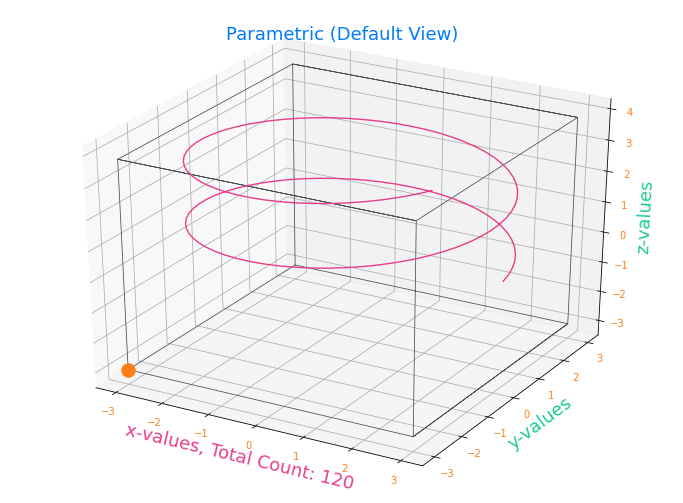

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Draws a 3D parametric curve")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_parametric_data()
ducky.draw_graph_3d_frame(pic,coor,lab="Parametric (Default View)")
ducky.draw_graph_3d_line(pic,coor)
canvas.show()

- The lesson fundamental is to demystify the 3D graph, and creating or understanding the data set is the foundation. Before moving forward with more visually beautiful equations, Ducky will draw the same parametric equation with scatter points, label each point, and rotate them.

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws a 3D parametric curve
---------------------------------------- : ----------------------------------------


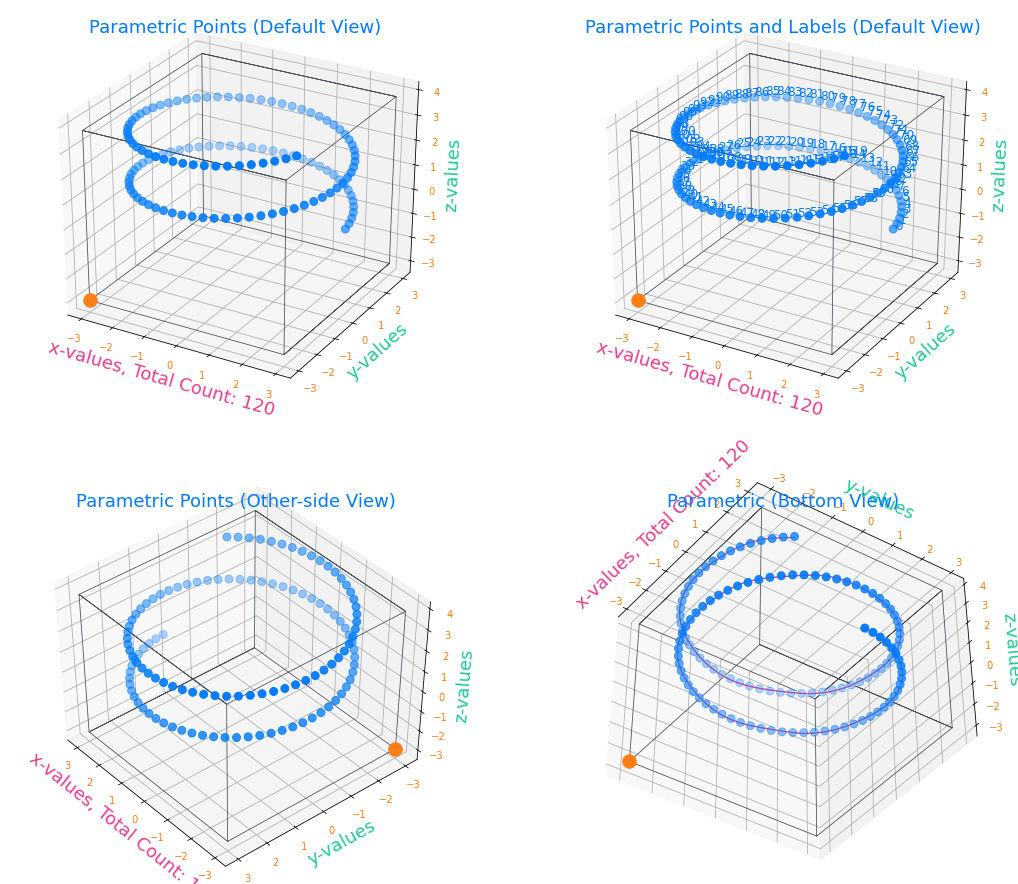

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Draws a 3D parametric curve")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d(row=2,col=2,siz=(18,16))
coor = ducky.fetch_parametric_data()
#
ducky.draw_graph_3d_frame(pic[0,0],coor,lab="Parametric Points (Default View)")
ducky.draw_graph_3d_point(pic[0,0],coor)
#
ducky.draw_graph_3d_frame(pic[0,1],coor,lab="Parametric Points and Labels (Default View)")
ducky.draw_graph_3d_point(pic[0,1],coor)
ducky.draw_graph_3d_point_label(pic[0,1],coor)
#
ducky.draw_graph_3d_frame(pic[1,0],coor,lab="Parametric Points (Other-side View)")
ducky.draw_graph_3d_point(pic[1,0],coor)
ducky.draw_graph_3d_tilt_rotate(pic[1,0], face="other")
#
ducky.draw_graph_3d_frame(pic[1,1],coor,lab="Parametric (Bottom View)")
ducky.draw_graph_3d_line_with_dots_hand_drawn(pic[1,1],coor)
ducky.draw_graph_3d_tilt_rotate(pic[1,1], face="bottom")
canvas.show()

## 2.7 Horse Saddle 3D Graph

- Has Ducky convinced you that 3D graphs are easy once you understand the 3D-data set?

- In the Artificial Neural Network (ANN), the data-set is massive. The 3D-data set not from a beautiful math equation but noisy data such as image's pixels, text tokens, or voice translation to audio frequency. 

- We'll wrap up the journey with a surface map. 

- Ducky chooses an easy equation, the "horse saddle," because his head will explode if it is a complex one. After all, he is a dog who chooses the name "Ducky."

1. Write the fetch() function to convert the parametric equation to a 3D-data set.

  - Ducky and I are not a mathematician, so we don't understand the need to draw beautiful equations in 3D. Ducky can grasp the 3D-data set dots placement in 3D space for a box or a ball, but nothing beyond that. Luckily, we are programmers, so give us your most complex equations that span across two chart boards, and in a few minutes, we will code it for you. It usually takes a handful of code-lines.

2. Teach Ducky how to draw a surface map using the same 3D-data set.


$$
X = \lambda * cos(\theta) \\
Y = \lambda * sin(\theta) \\
Z = sin((-1 * X) * Y) \\
0 < \theta_{0}^{36} < 2 * \pi \\
0.125 < \lambda_{0}^{8} < 1.0 
$$


In [ ]:
# fetch a parametric curve for the "horse saddle" equation above
@add_method(p3vi)
def fetch_parametric_horse_saddle(self, gamma=8, theta=36):
  _gamma = numpy.linspace(0.125, 1, gamma)
  _theta = numpy.linspace(0, 2*numpy.pi, theta)
  sz = gamma * theta
  mx = numpy.zeros((sz, 3)) # x, y, z coordinate
  i = 0
  for t in range(theta):
    for g in range(gamma):
      mx[i,0] = _gamma[g] * numpy.cos(_theta[t])  # x
      mx[i,1] = _gamma[g] * numpy.sin(_theta[t])  # y
      i = i + 1
  mx[:,2] = numpy.sin((-1 * mx[:,0]) * mx[:,1])  # z
  return mx

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws a 3D parametric horse shaddle
---------------------------------------- : ----------------------------------------


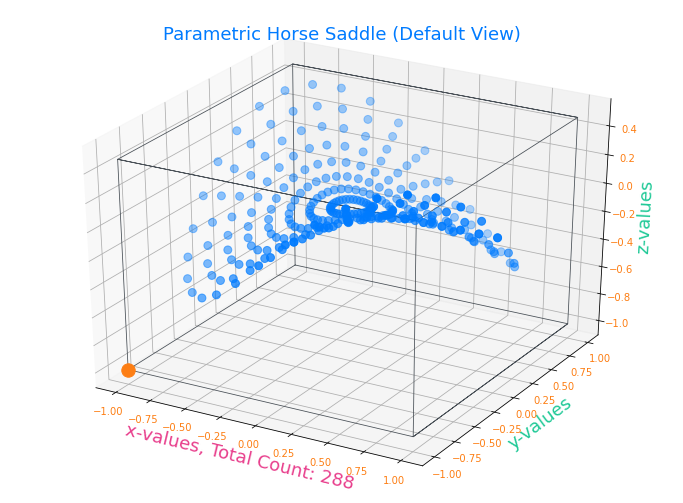

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Draws a 3D parametric horse shaddle")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_parametric_horse_saddle()
ducky.draw_graph_3d_frame(pic,coor,lab="Parametric Horse Saddle (Default View)")
ducky.draw_graph_3d_point(pic,coor)
canvas.show()

- The above code-cell takes ten code-lines for converting the parametric "horse saddle" equation to our 3D-data set. You can do it in fewer code-lines using Python and numpy advanced matrix multiplication functions and syntax. Ducky keeps it old-school because it is easier to switch between Python, Javascripts, and Swift.

- Drawing a 3D surface is the last trick before Ducky can head home for dinner. Ducky will display the result using the default view and the inverse view. The inverse picture shows the three hidden sides from the default view, i.e., the bottom and the other side view.


In [ ]:
# draw graph 3d surface chart
@add_method(p3vi)
def draw_graph_3d_surface(self, axe, mx, head="3D Surface",molo=None):
  # label it
  axe.set_title(head)
  # color map or map-color
  if molo is None:
    _molo = self.color_ocean_map
  else:
    _molo = molo    
  # draw it
  axe.plot_trisurf(mx[:,0], mx[:,1], mx[:,2], linewidth=0.2, antialiased=True,cmap=_molo)
  return

---------------------------------------- : ----------------------------------------
                                   Ducky : Draws a 3D parametric horse shaddle
---------------------------------------- : ----------------------------------------


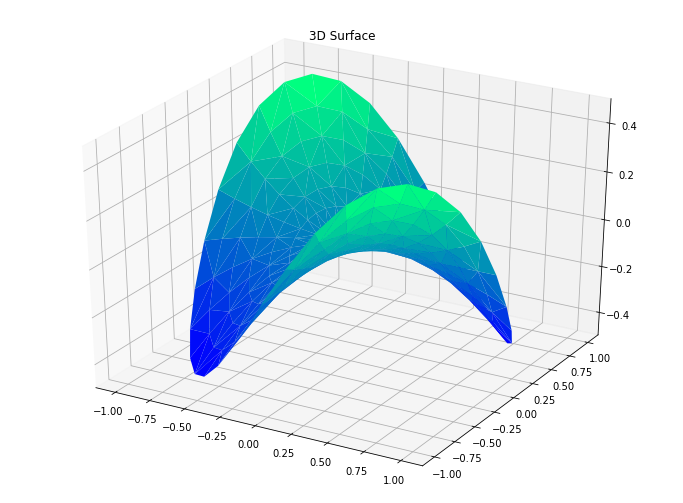

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Draws a 3D parametric horse shaddle")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d()
coor = ducky.fetch_parametric_horse_saddle()
ducky.draw_graph_3d_surface(pic,coor)
canvas.show()

- Ducky is not the alpha dog in the pack, but he has a few pretty cool tricks, like tilt and rotates at any angle. Along with his latest trick of drawing surface map, he can outsmart you on spatial acuity.

- Can you imagine what the horse saddle graph looks like on the other side view, bottom view, or face-front view?


---------------------------------------- : ----------------------------------------
                                   Ducky : Having fun before heading home.
---------------------------------------- : ----------------------------------------


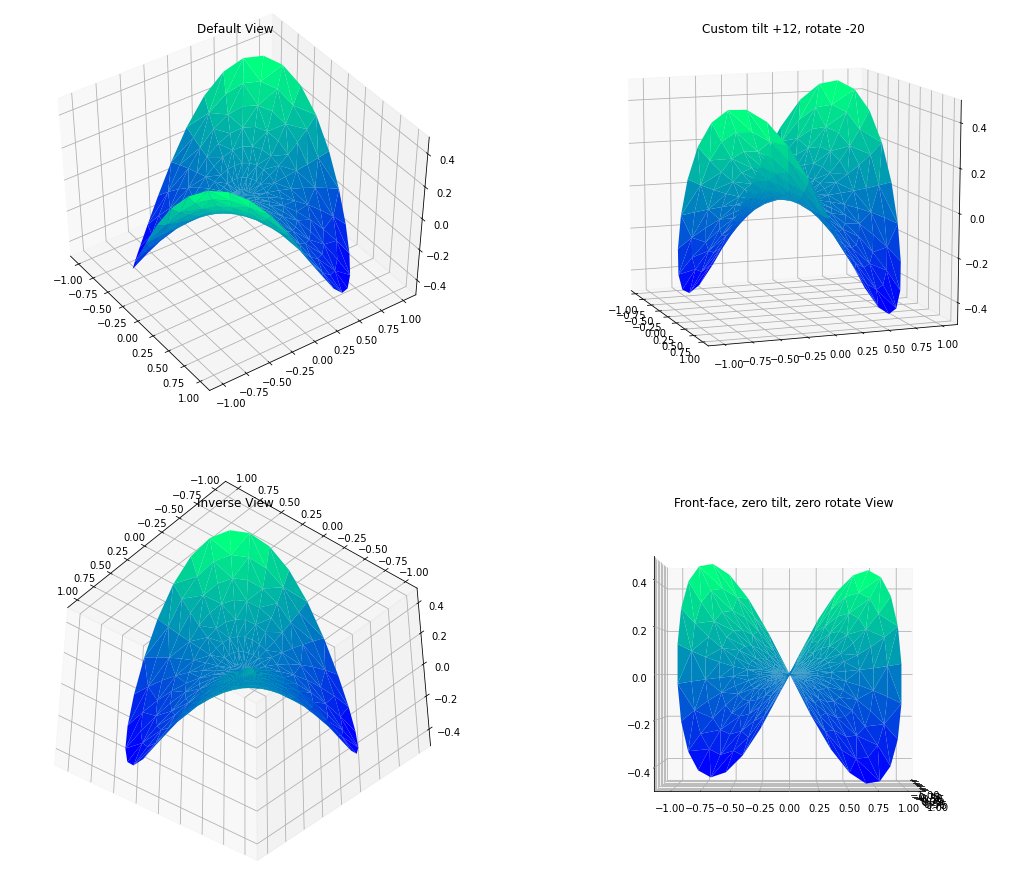

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Having fun before heading home.")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d(row=2, col=2,siz=(18,16))
coor = ducky.fetch_parametric_horse_saddle()
#
ducky.draw_graph_3d_surface(pic[0,0],coor, "Default View")
ducky.draw_graph_3d_tilt_rotate(pic[0,0],face="default")
#
ducky.draw_graph_3d_surface(pic[0,1],coor, "Custom tilt +12, rotate -20")
ducky.draw_graph_3d_tilt_rotate(pic[0,1],tilt=12,rota=-20)
#
ducky.draw_graph_3d_surface(pic[1,0],coor, "Inverse View")
ducky.draw_graph_3d_tilt_rotate(pic[1,0],face="inverse")
#
ducky.draw_graph_3d_surface(pic[1,1],coor, "Front-face, zero tilt, zero rotate View")
ducky.draw_graph_3d_tilt_rotate(pic[1,1],face="front")
canvas.show()

## 2.8 Spatial Accuity

- Ducky is showing off, and I have to admit that he is better at spatial acuity. I couldn't imagine the top view with no rotation. It's concentric circles. Once he draws it, then it makes sense. 

---------------------------------------- : ----------------------------------------
                                   Ducky : Showing off
---------------------------------------- : ----------------------------------------


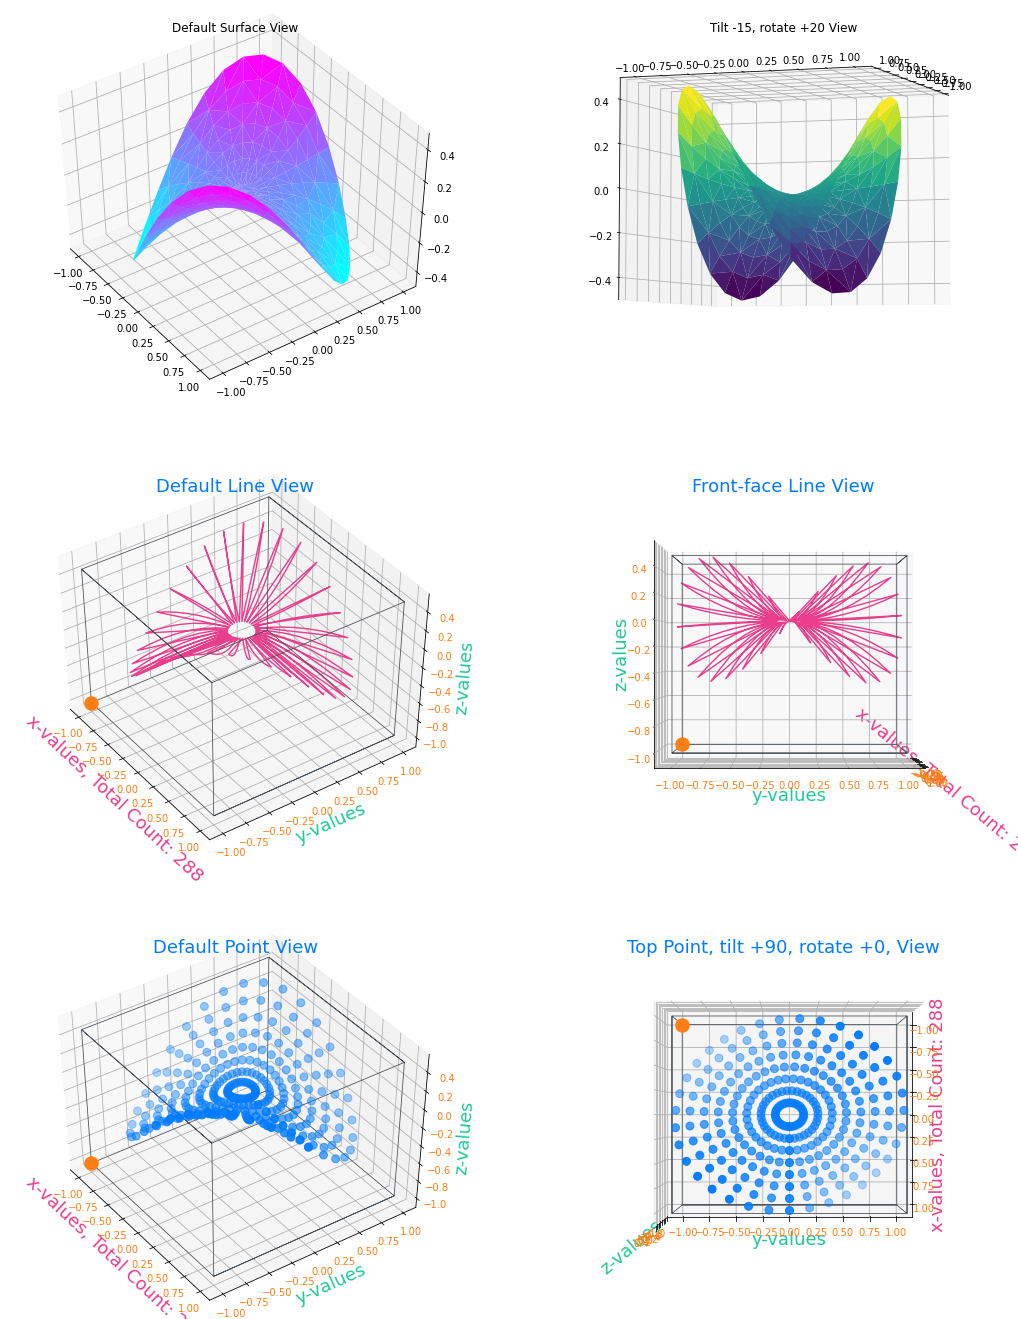

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Showing off")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d(row=3, col=2,siz=(18,24))
coor = ducky.fetch_parametric_horse_saddle()
#
ducky.draw_graph_3d_surface(pic[0,0],coor, head="Default Surface View",molo=ducky.color_bluepink_map)
ducky.draw_graph_3d_tilt_rotate(pic[0,0],face="default")
#
ducky.draw_graph_3d_surface(pic[0,1],coor, head="Tilt -15, rotate +20 View",molo=ducky.color_forest_map)
ducky.draw_graph_3d_tilt_rotate(pic[0,1],tilt=-5, rota=20)
#
ducky.draw_graph_3d_line(pic[1,0],coor)
ducky.draw_graph_3d_frame(pic[1,0], coor,lab="Default Line View")
ducky.draw_graph_3d_tilt_rotate(pic[1,0],face="default")
#
ducky.draw_graph_3d_line(pic[1,1],coor)
ducky.draw_graph_3d_frame(pic[1,1], coor,lab="Front-face Line View")
ducky.draw_graph_3d_tilt_rotate(pic[1,1],face="front")
#
ducky.draw_graph_3d_point(pic[2,0],coor)
ducky.draw_graph_3d_frame(pic[2,0], coor,lab="Default Point View")
ducky.draw_graph_3d_tilt_rotate(pic[2,0],face="default")
#
ducky.draw_graph_3d_point(pic[2,1],coor)
ducky.draw_graph_3d_frame(pic[2,1], coor,lab="Top Point, tilt +90, rotate +0, View")
ducky.draw_graph_3d_tilt_rotate(pic[2,1],tilt=90,rota=0)
#
canvas.show()

- It is a long journey with our trusting friend, Ducky. We start with an "x,y, and z" coordinate 3D-data set and draw lines in 3D space.

- Ducky has no 3D spatial acuity because he couldn’t find the bones buried in the third dimension (underground), so we teach Ducky about drawing a box as a frame, drawing points with the lines, and labeling the axis, and mark each dot with a sequence number.

- Ducky is not satisfied to stop where other books, blogs are classes end. He tilts and rotates until he fully grasps the 3D spatial acuity.

- Along the way, Ducky and I encourage you to hack this Jupyter notebook. It is because forging your new journey is the easiest and fun way to learn complex concepts. 

- Pushing forward in our journey, Ducky deep dives into 2.5D bar charts and 3D bar charts. He found that understand the "x,y, and z" coordinate 3D-data set is paramount. Coding the 3D graphs are easy after he learned how to create the 3D-data matrix.

- Ducky is looking for a more useful 3D-data set than random coordinates, so he detours to the parametric math equations. As it turns out, parametric equations create beautiful 3D surface maps.

- Ducky and I are happy that we traveled together, but we would be ecstatic if you have hacked the notebook and make it your journey. Drop us a line on LinkedIn, and we hope to see you on our next adventure.



## 2.9 - Bonus, Earflap Hat 3D Graphs (October 2020)

- When coming back to do the bonus section, we found that Ducky has run away.

- Rumor has it that he falls in love with a swan. We told him that he is not a “duck,” but such as life and love. The last anyone saw Ducky is that he swims down the river following his love. 

- We spawn a new “d3vi” and name him “Blinky.”

In [ ]:
# spawn Blinky
blinky = p3vi()

---------------------------------------- : ----------------------------------------
                              Hello from : p3vi
                               Author is : Duc Haba
---------------------------------------- : ----------------------------------------


- A colleague, a Math major, ask if we can replicate Google famous cartesian equation, ["sqrt(x * x + y * y) + 3 * cos(sqrt(x * x + y * y)) + 5"](https://www.google.com/search?sxsrf=ALeKk00YGp_jVlHzA6Sh0nEyw7y1j0pbGg%3A1602738471107&ei=J9mHX82DBtLO0PEPiqax2A4&q=sqrt%28x*x%2By*y%29%2B3*cos%28sqrt%28x*x%2By*y%29%29%2B5&oq=sqrt%28x*x%2By*y&gs_lcp=CgZwc3ktYWIQARgAMgUIABDJAzICCAAyBAgAEB4yBAgAEB4yBAgAEB4yBggAEAgQHjIGCAAQCBAeMgYIABAIEB4yBggAEAgQHjIGCAAQCBAeOgQIIxAnOgQIABBDOgUIABCRAjoHCAAQyQMQQzoICAAQsQMQgwE6BQgAELEDOggILhDHARCvAToFCC4QsQM6DQgAELEDEIMBEMkDEEM6CwguELEDEMcBEK8BOgcIABAUEIcCOgoIABDJAxAUEIcCUNOxB1jh9gdg_qAIaABwAHgAgAF9iAGiCJIBAzkuM5gBAKABAaoBB2d3cy13aXrAAQE&sclient=psy-ab)

- So we asked Blinky, and he said that he could do it in a blink. :-)

- Blinky calls the above cartesian equation, the “earflap hat.” There are many variations of the earflap hat equations. Any cartesian equation with a trigonometry function wrap around a square-root sum of the square (zeta) will create an earflap hat diagram. 

$$
\zeta = \sqrt[2]{x^2 + y^2} \\
f_1(google) = (\zeta + 3) * (cos(\zeta) + 5)\\
OR \\
f_2(other) = sin(\zeta)
$$


In [ ]:
# fetch the earflap hat parametric curve (first, google)
@add_method(p3vi)
def _fetch_earflap_hat_1(self, x, y):
  i = numpy.sqrt(numpy.square(x)+numpy.square(y))
  z = (i + 3) * numpy.cos(i + 5)
  return z
#
#
# fetch the earflap hat parametric curve (second, fun simple one)
@add_method(p3vi)
def _fetch_earflap_hat_2(self, x, y):
  i = numpy.sqrt(numpy.square(x)+numpy.square(y))
  z = numpy.sin(i)
  return z
#
#
# fetch earflap hat
@add_method(p3vi)
def fetch_3d_cartesian_equation(self, _parametric_function, min_range=-6.0, max_range=6.0, max_count=100):
  # x-value, y-value
  _x = _y = numpy.linspace(min_range, max_range, num=max_count)
  # create a mesh-grid
  x, y =  numpy.meshgrid(_x, _y)
  z = _parametric_function(x, y)
  return x,y,z

In [ ]:
# draw graph 3d parametric surface chart
@add_method(p3vi)
def draw_graph_3d_parametric_surface(self, axe, X,Y,Z, head="3D Parametric Surface",molo=None):
  # label it
  axe.set_title(head)
  # color map or map-color
  if molo is None:
    _molo = self.color_ocean_map
  else:
    _molo = molo    
  # draw it
  axe.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=_molo, edgecolor='none')
  return

In [ ]:
# draw graph 3d parametric surface chart
blinky.see_color()
@add_method(p3vi)
def draw_graph_3d_earflap_hats(self):
  # setup
  canvas, pic = self.fetch_canvas_3d(row=1,col=2, siz=(20,8))
  x1,y1,z1 = self.fetch_3d_cartesian_equation(self._fetch_earflap_hat_1)
  self.draw_graph_3d_parametric_surface(pic[0], x1,y1,z1,head="Google: (zeta + 3) * (cos(zeta) + 5)")
  #
  x2,y2,z2 = self.fetch_3d_cartesian_equation(self._fetch_earflap_hat_2)
  self.draw_graph_3d_parametric_surface(pic[1], x2,y2,z2,molo=self.color_forest_map, head="Fun Simple: sin(zeta)")  
  #
  canvas.show()
  return

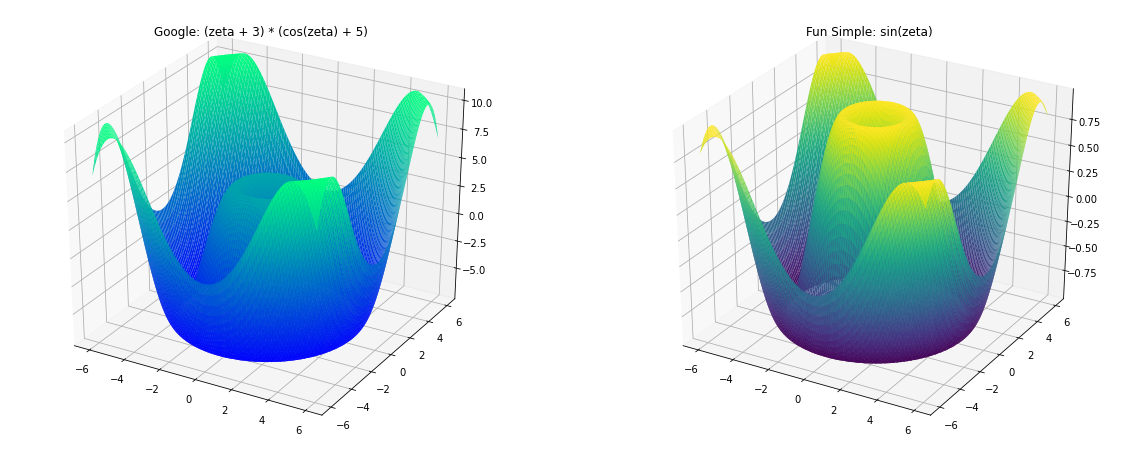

In [ ]:
# do it
blinky.draw_graph_3d_earflap_hats()

- Blinky is right. Once you factor out the zeta and simplify the equations, they all look simple, and it takes exactly two lines of code. You can refactor to one-line of code. Here is your chance to hack. :-)

- If you like to hack, you can use or create any equations, as long as the “z” value is in cartesian math, i.e., z = f(x,y), and graph it.

- Blinky is a fast learner. He creates the below graph with the knowledge of tilts and rotates from Ducky. The bottom two charts are with random tilting and rotating. Therefore, every time you re-run the code-cell, it draws different graphs. 

In [ ]:
# draw graph 3d parametric surface chart
blinky.see_color()
@add_method(p3vi)
def draw_graph_3d_earflap_hats_multiviews(self):
  # setup
  self.color_flowers_map = matplotlib.pyplot.get_cmap("plasma")
  canvas, pic = self.fetch_canvas_3d(row=2,col=2, siz=(20,16))
  x1,y1,z1 = self.fetch_3d_cartesian_equation(self._fetch_earflap_hat_1)
  self.draw_graph_3d_parametric_surface(pic[0,0], x1,y1,z1,head="Default View",molo=self.color_flowers_map)
  #
  self.draw_graph_3d_parametric_surface(pic[0,1], x1,y1,z1,head="Inverse View",molo=self.color_flowers_map)  
  self.draw_graph_3d_tilt_rotate(pic[0,1],face="inverse")
  #
  t = round(numpy.random.randint(-80,80))
  r = round(numpy.random.randint(-130,130))
  h = "Random View, (T:  " + str(t) + ",R: " + str(r) + ")"
  self.draw_graph_3d_parametric_surface(pic[1,0], x1,y1,z1,head=h,molo=self.color_flowers_map)  
  self.draw_graph_3d_tilt_rotate(pic[1,0],tilt=t,rota=r)
  #
  t = round(numpy.random.randint(-80,80))
  r = round(numpy.random.randint(-130,130))
  h = "Random View, (T:  " + str(t) + ",R: " + str(r) + ")"
  self.draw_graph_3d_parametric_surface(pic[1,1], x1,y1,z1,head=h,molo=self.color_flowers_map)  
  self.draw_graph_3d_tilt_rotate(pic[1,1],tilt=t,rota=r)  
  canvas.show()
  return

---------------------------------------- : ----------------------------------------
                                  Blinky : Draws Multi-views 3D Earflap Hats
---------------------------------------- : ----------------------------------------


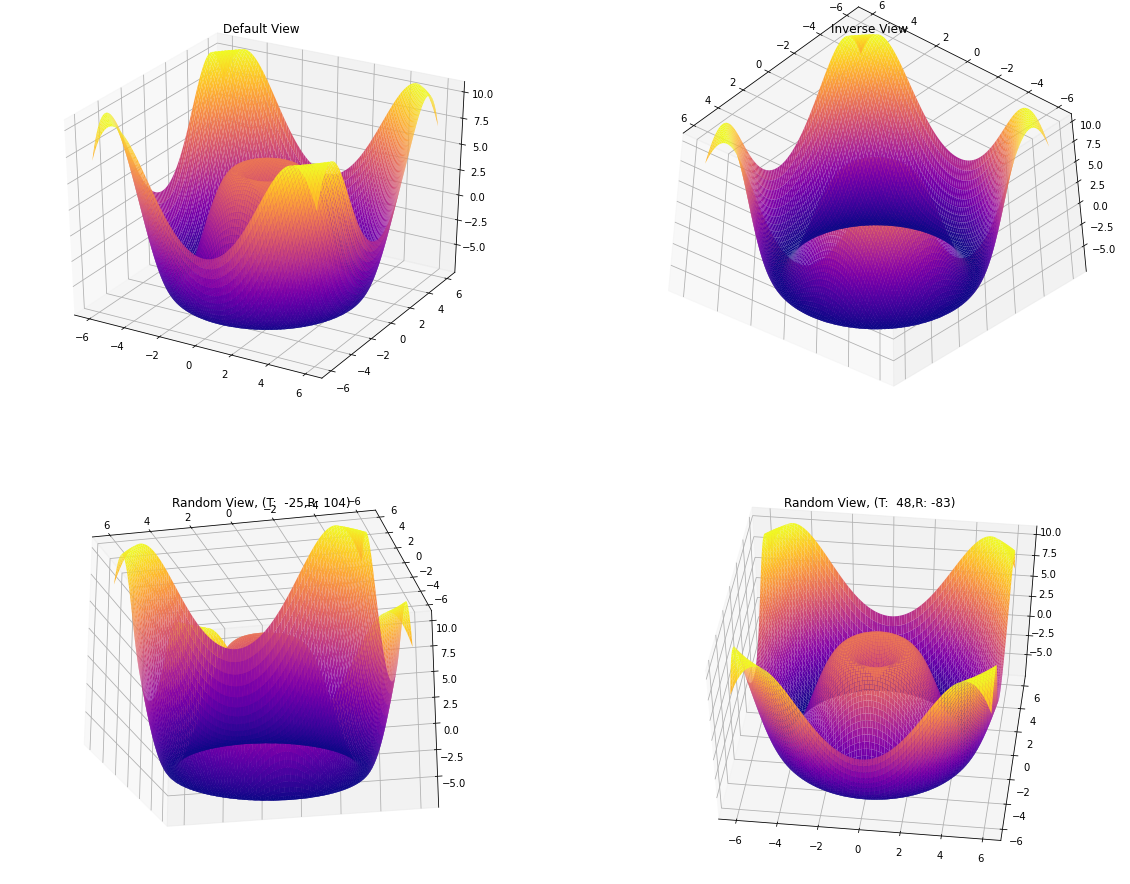

In [ ]:
# do it
blinky._ph()
blinky._pp("Blinky", "Draws Multi-views 3D Earflap Hats")
blinky._ph()
#
blinky.draw_graph_3d_earflap_hats_multiviews()

- Blinky, like Ducky, will not stop at replicating what others do. He wants to do something Google can’t do. 

- Can Google draw a 3D contour graph? The benefit of a 3D contour chart is you can see through the inner structure, and it is beautiful. How cool is that?


In [ ]:
# draw graph 3d parametric surface chart
@add_method(p3vi)
def draw_graph_3d_parametric_contour(self, axe, X,Y,Z, head="3D Parametric Contour",molo=None):
  # label it
  axe.set_title(head)
  # color map or map-color
  if molo is None:
    _molo = self.color_bluepink_map
  else:
    _molo = molo    
  # draw it
  axe.contour3D(X, Y, Z, 50,cmap=_molo)
  return

In [ ]:
@add_method(p3vi)
def draw_graph_3d_earflap_hats_contour(self):
  # setup
  canvas, pic = self.fetch_canvas_3d()
  x,y,z = self.fetch_3d_cartesian_equation(self._fetch_earflap_hat_2)
  self.draw_graph_3d_parametric_contour(pic, x,y,z,head="Earflap Hat 3D Contour")
  #
  canvas.show()
  return

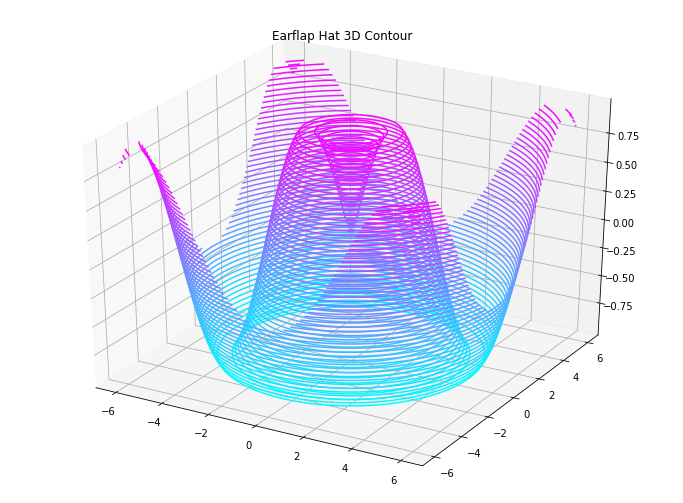

In [ ]:
# do it
blinky.draw_graph_3d_earflap_hats_contour()

- For the Math major, at any age, can you guess what equation generates the below “whirlpool” graph? (No peeking at the two code-lines below)

In [ ]:
#
@add_method(p3vi)
def _fetch_3d_whirlpool(self, x, y):
  i = numpy.sqrt(numpy.square(x)+numpy.square(y))
  z = numpy.tanh(i)
  return z
#
#
# draw whirlpool
@add_method(p3vi)
def draw_graph_3d_whirlpool(self):
  # setup
  canvas, pic = self.fetch_canvas_3d()
  x,y,z = self.fetch_3d_cartesian_equation(self._fetch_3d_whirlpool,min_range=-2.5,max_range=2.5, max_count=50)
  self.draw_graph_3d_parametric_surface(pic, x,y,z,head="3D Whirlpool")
  #
  canvas.show()
  return

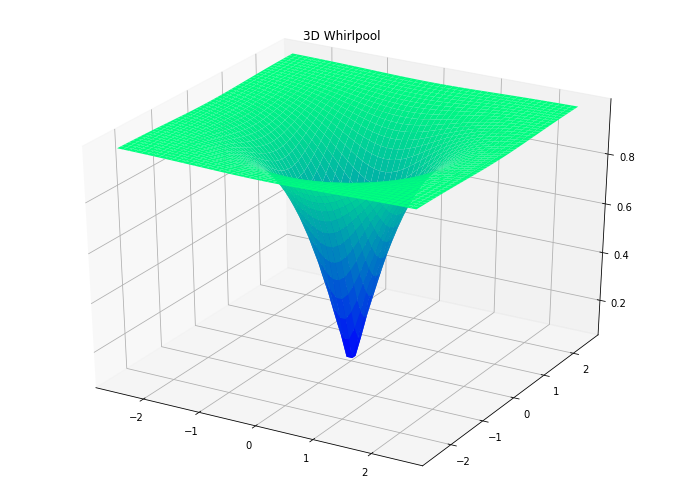

In [ ]:
# do it
blinky.draw_graph_3d_whirlpool()

### 2.9.1 - If Blinky stumped you, then open the cell below.

- Hyperbolic Tangent of "zeta"

$$
f_3(x,y) = tanh(\zeta)
$$

><center><h2><i>The End.</i></h2></center>

# 3 - Conclusion

It is one of the best journeys that I wrote. I learn more about the 3D graph then the past four years of using 3D plot packages, libraries, and stand-alone programs, both open-source and paid versions.

I previewed this Jupyter notebook to a handful of friends, and they hacked it. They took the "p3vi" object down the rabbit-hole of their discipline. I'm pleading with them to publish their finding on a Jupyter notebook and not to their professional or trade blog sites. 

Teaching is about fostering original thoughts and not about memorization. Once I start doing it with a Jupyter notebook, there is no going back. The notebook gives us interactivity and individuality. No book, audio, or video can do that. It makes no difference that I am teaching myself or teaching others. 

The next time you or I re-read the notebook, we can hack it and make it into something new. The notebook enables you to explore a brilliant epiphany or silly hunches. 

For example, I took the simple "spring" parametric equation above and plotted it using a surface map. The results are more on the silly hunches side, but they are beautiful. It's such a price for exploration. It's 98% dead-ends, scraped knees, and bloody noses. 




---------------------------------------- : ----------------------------------------
                                   Ducky : Hunches ... side way love.
---------------------------------------- : ----------------------------------------


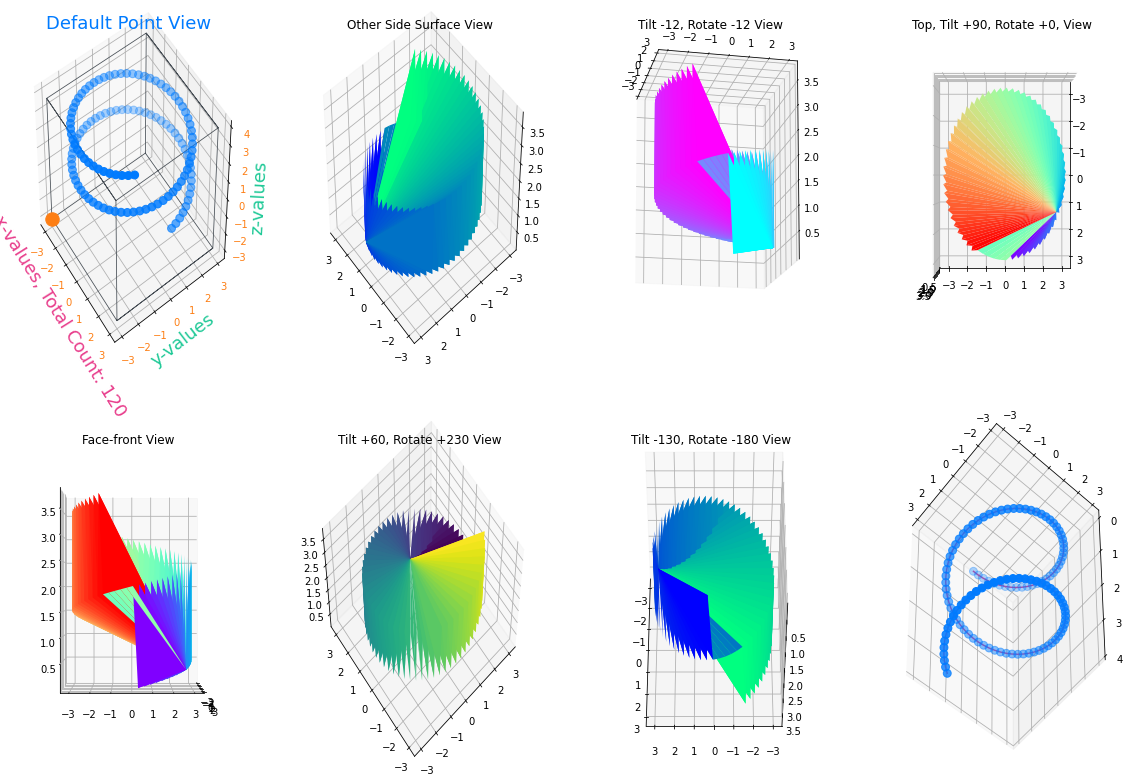

In [ ]:
# testing ducky new trick
ducky._ph()
ducky._pp("Ducky", "Hunches ... side way love.")
ducky._ph()
#
canvas, pic = ducky.fetch_canvas_3d(row=2, col=4, siz=(20,14))
coor = ducky.fetch_parametric_data()
#
ducky.draw_graph_3d_point(pic[0,0],coor)
ducky.draw_graph_3d_frame(pic[0,0], coor,lab="Default Point View")
ducky.draw_graph_3d_tilt_rotate(pic[0,0],face="default")
#
ducky.draw_graph_3d_surface(pic[0,1],coor,head="Other Side Surface View")
ducky.draw_graph_3d_tilt_rotate(pic[0,1],face="other")
#
ducky.draw_graph_3d_surface(pic[0,2],coor,head="Tilt -12, Rotate -12 View",molo=ducky.color_bluepink_map)
ducky.draw_graph_3d_tilt_rotate(pic[0,2],tilt=-12,rota=-12)
#
ducky.draw_graph_3d_surface(pic[0,3],coor,head="Top, Tilt +90, Rotate +0, View",molo=ducky.color_rainbow_map)
ducky.draw_graph_3d_tilt_rotate(pic[0,3],tilt=90,rota=0)
#
ducky.draw_graph_3d_surface(pic[1,0],coor,head="Face-front View",molo=ducky.color_rainbow_map)
ducky.draw_graph_3d_tilt_rotate(pic[1,0],face="front")
#
ducky.draw_graph_3d_surface(pic[1,1],coor,head="Tilt +60, Rotate +230 View",molo=ducky.color_forest_map)
ducky.draw_graph_3d_tilt_rotate(pic[1,1],tilt=60,rota=230)
#
ducky.draw_graph_3d_surface(pic[1,2],coor,head="Tilt -130, Rotate -180 View",molo=ducky.color_ocean_map)
ducky.draw_graph_3d_tilt_rotate(pic[1,2],tilt=-130,rota=-180)
#
ducky.draw_graph_3d_line_with_dots(pic[1,3],coor)
ducky.draw_graph_3d_tilt_rotate(pic[1,3],tilt=-220,rota=40)
canvas.show()

Beyond the power of sharing and interactivity, the notebook is a more efficient method for trying out new coding concepts before using an IDE, like Atom, to program it.

I wish that I know about using Jupyter notebook five, ten years ago. Back then, I was working for LeVar Burton to create interactive mobile book apps. Can Jupyter's notebook extend beyond computer and math to art, music, and storytelling? I don't know, but I would love to find out.

- On LinkedIn, ["Demystify Python 3D Visualization -- A Hackable Step-by-step Jupyter Notebook"](https://www.linkedin.com/pulse/python-3d-visualization-hackable-step-by-step-jupyter-duc-haba/).

- If you read this on LinkedIn, what are you waiting for? Heading over to Github, using Google Collab or your favorite Jupyter notebook cloud service, and hacking away. [GitHub, "p3vi" Python 3D Visualization](https://github.com/duchaba/python_3D_visualization_p3vi)

In [ ]:
# end of jupyter notebook